# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)



### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.


In [1]:
# Import basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# import libraries for modelling
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression

In [3]:
# webscrape job postings from https://www.mycareersfuture.sg/ using keyword 'data'

df = pd.read_csv('./jobs_data.csv')

In [4]:
df.head()

,Unnamed: 0,coy_name,employment_type,job_title,seniority,salary,salary_type,job_description,requirement,location,urls
0,0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,"$5,000to$7,000",Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...
1,1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,"$2,200to$6,000",Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...
2,2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Data Center Engineering Project Engineer APAC,Professional,"$9,000to$12,000",Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...
3,3,JOHNSON & JOHNSON PTE. LTD.,Permanent,Lead Data Center Engineer,Professional,"$5,000to$10,000",Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...
4,4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,Data Scientist - Intern (6 months),Fresh/entry level,"$800to$1,500",Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...


In [5]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [6]:
df.head(2)

,coy_name,employment_type,job_title,seniority,salary,salary_type,job_description,requirement,location,urls
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,"$5,000to$7,000",Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,"$2,200to$6,000",Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...


In [7]:
df.shape

(1900, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 10 columns):
coy_name           1871 non-null object
employment_type    1871 non-null object
job_title          1871 non-null object
seniority          1839 non-null object
salary             1674 non-null object
salary_type        1674 non-null object
job_description    1871 non-null object
requirement        1795 non-null object
location           1824 non-null object
urls               1900 non-null object
dtypes: object(10)
memory usage: 148.5+ KB


In [9]:
# check for duplicates
df.duplicated().sum()

0

In [10]:
df[df.salary.isnull()]

,coy_name,employment_type,job_title,seniority,salary,salary_type,job_description,requirement,location,urls
12,NEWFORT HOSPITALITY MANAGEMENT,Full Time,PERFORMANCE DEVELOPMENT ANALYST,Senior Executive,NaN,NaN,The Performance Development Analyst performs t...,- Minimum 1-2 years relevant working experienc...,Central,https://www.mycareersfuture.sg/job/performance...
21,AMAZON ASIA-PACIFIC HOLDINGS PRIVATE LIMITED,Full Time,"Marketing Manager, Prime Now",Manager,NaN,NaN,"We are seeking a talented, creative, and dynam...",Basic Qualifications Bachelor’s Degree with ...,Central,https://www.mycareersfuture.sg/job/marketing-m...
24,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Product Analyst,Senior Executive,NaN,NaN,Get to know our Team: Product Analytics cares...,The must haves: atleast 4+ years experience i...,Central,https://www.mycareersfuture.sg/job/product-ana...
30,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Product Analyst,Executive,NaN,NaN,Get to know our Team: Product Analytics cares...,"The must haves: Experience in Analytics, Busi...",Central,https://www.mycareersfuture.sg/job/product-ana...
47,DU PONT COMPANY (SINGAPORE) PTE. LTD.,Full Time,"Food Enzyme Application Scientist, Bakery",Senior Management,NaN,NaN,Key responsibilities include but are not limit...,Qualifications: PhD or Master’s degree in Bi...,South,https://www.mycareersfuture.sg/job/food-enzyme...
48,5-HOUR INTERNATIONAL CORPORATION PRIVATE LIMITED,"Permanent, Full Time","Manager, Digital Media",Manager,NaN,NaN,"About the Company: Introduced in 2004, 5-hour ...",Skills/Qualifications: Minimum relevant Unive...,North,https://www.mycareersfuture.sg/job/manager-dig...
53,AUTODESK ASIA PTE. LTD.,Full Time,Client Services Representative,Executive,NaN,NaN,Operational Support: Enter orders into the ap...,Desired Requirements: Strong communication sk...,South,https://www.mycareersfuture.sg/job/client-serv...
54,Smart Nation and Digital Government Office,Full Time,"Manager / Senior Manager, Finance and Resour...",NaN,NaN,NaN,Excited to make a difference to Smart Nation? ...,NaN,NaN,https://www.mycareersfuture.sg/job/manager-sen...
56,SINGAPORE YACHT EVENTS PTE. LTD.,Internship,Marketing Intern,Fresh/entry level,NaN,NaN,As a marketing intern you'll have the opportun...,Language : Basic spoken and written English S...,Central,https://www.mycareersfuture.sg/job/marketing-i...
57,EXPONENT GLOBAL CONSULTING PTE. LTD.,"Permanent, Full Time",Sales Coordinator - International Trading,"Executive, Junior Executive",NaN,NaN,The Employer The employer is a Singapore-bas...,Requirements Ideal candidates will have: ...,South,https://www.mycareersfuture.sg/job/sales-coord...


In [11]:
df[df.salary.isnull()].index

Int64Index([  12,   21,   24,   30,   47,   48,   53,   54,   56,   57,
            ...
            1784, 1789, 1821, 1822, 1836, 1843, 1862, 1873, 1874, 1892],
           dtype='int64', length=226)

In [12]:
# quick check shows that these jobs' salary are not disclosed
# will drop these rows by index
df.drop(df[df.salary.isnull()].index, axis=0, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1899
Data columns (total 10 columns):
coy_name           1674 non-null object
employment_type    1674 non-null object
job_title          1674 non-null object
seniority          1671 non-null object
salary             1674 non-null object
salary_type        1674 non-null object
job_description    1674 non-null object
requirement        1637 non-null object
location           1637 non-null object
urls               1674 non-null object
dtypes: object(10)
memory usage: 143.9+ KB


In [14]:
# drop the remaining np.nan columns as they do not contain job requirement 
df.dropna(axis=0,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1637 entries, 0 to 1899
Data columns (total 10 columns):
coy_name           1637 non-null object
employment_type    1637 non-null object
job_title          1637 non-null object
seniority          1637 non-null object
salary             1637 non-null object
salary_type        1637 non-null object
job_description    1637 non-null object
requirement        1637 non-null object
location           1637 non-null object
urls               1637 non-null object
dtypes: object(10)
memory usage: 140.7+ KB


In [16]:
df.reset_index(drop=True,inplace=True)

#### Data cleaning 

In [17]:
df.salary_type.unique()

array(['Monthly', 'Annually'], dtype=object)

In [18]:
df.salary[:2]

0    $5,000to$7,000
1    $2,200to$6,000
Name: salary, dtype: object

In [19]:
# break salary range to min and max
df.salary = df.salary.map(lambda x: str(x).replace('$','').split('to'))

In [20]:
df.salary[:2]

0    [5,000, 7,000]
1    [2,200, 6,000]
Name: salary, dtype: object

In [21]:
df.salary[0][0]

'5,000'

In [22]:
df.salary[0][1]

'7,000'

In [23]:
df['min_salary'] = df.salary.map(lambda x: float(x[0].replace(',','')))

In [24]:
df['min_salary'].head(2)

0    5000.0
1    2200.0
Name: min_salary, dtype: float64

In [25]:
df['max_salary'] = df.salary.map(lambda x: float(x[1].replace(',','')))

In [26]:
df['max_salary'].head(2)

0    7000.0
1    6000.0
Name: max_salary, dtype: float64

In [27]:
# remove column as replaced with min & max salary 
df.drop('salary', axis=1, inplace=True)

In [28]:
df[df.salary_type == 'Annually'].head(2)

,coy_name,employment_type,job_title,seniority,salary_type,job_description,requirement,location,urls,min_salary,max_salary
47,TIGERSPIKE PTE. LTD.,Full Time,Senior UI Designer,Senior Executive,Annually,Tigerspike Singapore is looking for a Senior U...,Who are you? You have at least 6 years of pro...,Central,https://www.mycareersfuture.sg/job/senior-ui-d...,95000.0,120000.0
116,DHL EXPRESS (SINGAPORE) PTE. LTD.,Permanent,Reporting Senior Analyst,Senior Executive,Annually,Role Purpose Be the subject matter expert in ...,Requirements University degree or equivalent ...,Central,https://www.mycareersfuture.sg/job/reporting-s...,65000.0,90000.0


In [29]:
# create new column for average salary
df['ave_salary'] = (df['min_salary'] + df['max_salary'])/2

In [30]:
df.head(2)

,coy_name,employment_type,job_title,seniority,salary_type,job_description,requirement,location,urls,min_salary,max_salary,ave_salary
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,7000.0,6000.0
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,6000.0,4100.0


In [31]:
# index of rows where salary_type is annual
index = df[df.salary_type == 'Annually'].index

In [32]:
# convert annual salary type to monthly
df.iloc[index,-3:-1] = df.iloc[index,-3:-1].apply(lambda x: x/12)
# range -3:-1 does not include -1
df.iloc[index,-1] = df.iloc[index,-1].apply(lambda x: x/12)

In [33]:
df[df.salary_type == 'Annually'].head(2)

,coy_name,employment_type,job_title,seniority,salary_type,job_description,requirement,location,urls,min_salary,max_salary,ave_salary
47,TIGERSPIKE PTE. LTD.,Full Time,Senior UI Designer,Senior Executive,Annually,Tigerspike Singapore is looking for a Senior U...,Who are you? You have at least 6 years of pro...,Central,https://www.mycareersfuture.sg/job/senior-ui-d...,7916.666667,10000.0,8958.333333
116,DHL EXPRESS (SINGAPORE) PTE. LTD.,Permanent,Reporting Senior Analyst,Senior Executive,Annually,Role Purpose Be the subject matter expert in ...,Requirements University degree or equivalent ...,Central,https://www.mycareersfuture.sg/job/reporting-s...,5416.666667,7500.0,6458.333333


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


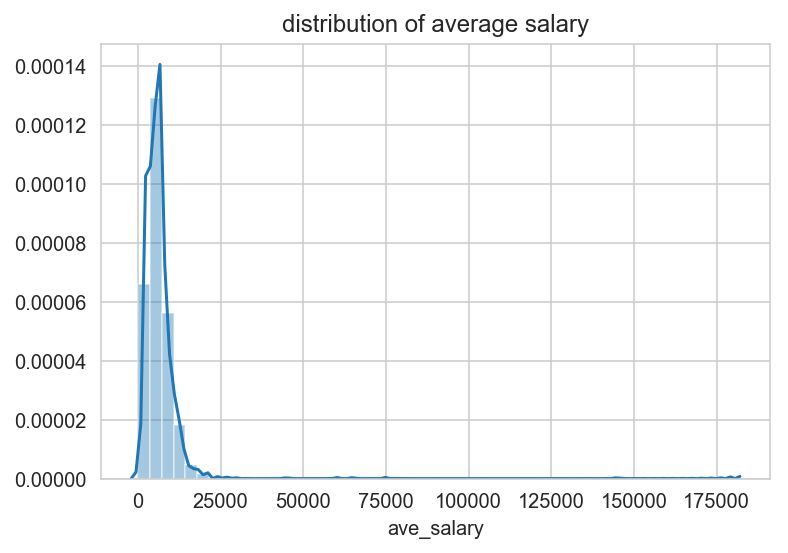

In [34]:
# plot the distribution of average salary after cleaning
sns.distplot(df["ave_salary"])
plt.title("distribution of average salary")
plt.show()

In [35]:
df['ave_salary'].describe()

count      1637.000000
mean       6526.503156
std        7036.006347
min          10.000000
25%        3750.000000
50%        6000.000000
75%        7500.000000
max      180000.000000
Name: ave_salary, dtype: float64

In [36]:
# check for outliers
mean = np.mean(df['ave_salary'])
std = np.std(df['ave_salary'])
df[df['ave_salary']>(mean+3*std)].shape

(7, 12)

In [37]:
df[df['ave_salary']>(mean+3*std)]

,coy_name,employment_type,job_title,seniority,salary_type,job_description,requirement,location,urls,min_salary,max_salary,ave_salary
91,INC RESEARCH CRO SINGAPORE PTE. LTD.,"Permanent, Full Time",SR Site Start-up & Regulatory Specialist,"Professional, Senior Executive",Monthly,Performs assigned activities within the countr...,Requirements: BA/BS degree in the science/he...,Islandwide,https://www.mycareersfuture.sg/job/sr-site-sta...,70000.0,80000.000000,75000.000000
443,JONES LANG LASALLE PROPERTY CONSULTANTS PTE LTD,"Permanent, Full Time",Senior Investment Strategist,Senior Management,Annually,"Head of Data Centre Capital Markets, APAC Alte...",Sound like you? To apply you need to be: A Dat...,Central,https://www.mycareersfuture.sg/job/senior-inve...,25000.0,33333.333333,29166.666667
704,ULTRA CLEAN ASIA PACIFIC PTE. LTD.,"Permanent, Full Time",Chief Operationg Officer,Senior Management,Monthly,Designing and implementing business operation...,Pivotal Experience & Expertise Operational ex...,North,https://www.mycareersfuture.sg/job/chief-opera...,40000.0,80000.000000,60000.000000
965,IHS MARKIT ASIA PTE. LTD.,"Permanent, Full Time","Senior Associate, Research and Analysis (Korea...",Senior Executive,Monthly,Department overview: IHS Markit’s Dividend For...,Education and experience Undergraduate degr...,Central,https://www.mycareersfuture.sg/job/senior-asso...,50000.0,80000.000000,65000.000000
1021,NCS PTE. LTD.,Permanent,Lead / Senior Database Administrator,Professional,Monthly,"Position Summary Setup, deploy and maintain s...",Minimum 3 years of experience in database adm...,North,https://www.mycareersfuture.sg/job/lead-senior...,5000.0,85000.000000,45000.000000
1249,SIX FINANCIAL INFORMATION SINGAPORE PTE. LTD.,Full Time,Senior Sales Manager,Middle Management,Monthly,The new position is available in our Singapore...,Candidates should have a backgroud in selling ...,Central,https://www.mycareersfuture.sg/job/senior-sale...,120000.0,170000.000000,145000.000000
1293,SIX FINANCIAL INFORMATION SINGAPORE PTE. LTD.,Full Time,Head of SSO (APAC),Middle Management,Monthly,The SSO group provides business support servic...,Main Duties 1. A key positive aspect of the SI...,Central,https://www.mycareersfuture.sg/job/head-sso-si...,144000.0,216000.000000,180000.000000


In [38]:
df[df['ave_salary']>(mean+3*std)]

,coy_name,employment_type,job_title,seniority,salary_type,job_description,requirement,location,urls,min_salary,max_salary,ave_salary
91,INC RESEARCH CRO SINGAPORE PTE. LTD.,"Permanent, Full Time",SR Site Start-up & Regulatory Specialist,"Professional, Senior Executive",Monthly,Performs assigned activities within the countr...,Requirements: BA/BS degree in the science/he...,Islandwide,https://www.mycareersfuture.sg/job/sr-site-sta...,70000.0,80000.000000,75000.000000
443,JONES LANG LASALLE PROPERTY CONSULTANTS PTE LTD,"Permanent, Full Time",Senior Investment Strategist,Senior Management,Annually,"Head of Data Centre Capital Markets, APAC Alte...",Sound like you? To apply you need to be: A Dat...,Central,https://www.mycareersfuture.sg/job/senior-inve...,25000.0,33333.333333,29166.666667
704,ULTRA CLEAN ASIA PACIFIC PTE. LTD.,"Permanent, Full Time",Chief Operationg Officer,Senior Management,Monthly,Designing and implementing business operation...,Pivotal Experience & Expertise Operational ex...,North,https://www.mycareersfuture.sg/job/chief-opera...,40000.0,80000.000000,60000.000000
965,IHS MARKIT ASIA PTE. LTD.,"Permanent, Full Time","Senior Associate, Research and Analysis (Korea...",Senior Executive,Monthly,Department overview: IHS Markit’s Dividend For...,Education and experience Undergraduate degr...,Central,https://www.mycareersfuture.sg/job/senior-asso...,50000.0,80000.000000,65000.000000
1021,NCS PTE. LTD.,Permanent,Lead / Senior Database Administrator,Professional,Monthly,"Position Summary Setup, deploy and maintain s...",Minimum 3 years of experience in database adm...,North,https://www.mycareersfuture.sg/job/lead-senior...,5000.0,85000.000000,45000.000000
1249,SIX FINANCIAL INFORMATION SINGAPORE PTE. LTD.,Full Time,Senior Sales Manager,Middle Management,Monthly,The new position is available in our Singapore...,Candidates should have a backgroud in selling ...,Central,https://www.mycareersfuture.sg/job/senior-sale...,120000.0,170000.000000,145000.000000
1293,SIX FINANCIAL INFORMATION SINGAPORE PTE. LTD.,Full Time,Head of SSO (APAC),Middle Management,Monthly,The SSO group provides business support servic...,Main Duties 1. A key positive aspect of the SI...,Central,https://www.mycareersfuture.sg/job/head-sso-si...,144000.0,216000.000000,180000.000000


In [39]:
index = df[df['ave_salary']>(mean+3*std)].index
index2 = index[[0,3,4,5,6]]
index2

Int64Index([91, 965, 1021, 1249, 1293], dtype='int64')

In [40]:
# seems like there was a typo error as some positions don't warrant such high pay
# remove 1 zero from these jobs 
df.iloc[index2,-3:-1]= df.iloc[index2,-3:-1].apply(lambda x: x/10)
df.iloc[index2,-1]= df.iloc[index2,-1].apply(lambda x: x/10)

# remove 1 outlier, monthly salary = 60000
df.drop(index=704,axis=0,inplace=True)

In [41]:
df.iloc[index2]

,coy_name,employment_type,job_title,seniority,salary_type,job_description,requirement,location,urls,min_salary,max_salary,ave_salary
91,INC RESEARCH CRO SINGAPORE PTE. LTD.,"Permanent, Full Time",SR Site Start-up & Regulatory Specialist,"Professional, Senior Executive",Monthly,Performs assigned activities within the countr...,Requirements: BA/BS degree in the science/he...,Islandwide,https://www.mycareersfuture.sg/job/sr-site-sta...,7000.0,8000.0,7500.0
966,SMITECH ENGINEERING PTE LTD,Permanent,Accountant,Executive,Monthly,The Accountant reports to the Finance Manager ...,~ Prepare accurate and timely tax and financia...,East,https://www.mycareersfuture.sg/job/accountant-...,3500.0,4500.0,4000.0
1022,RAFFLES INSTITUTION,"Contract, Full Time",Laboratory Officer,Non-executive,Monthly,Performing house-keeping duties and ensuring ...,Strong knowledge of laboratory procedures inc...,North,https://www.mycareersfuture.sg/job/laboratory-...,1300.0,2800.0,2050.0
1250,SINGAPORE AMERICAN SCHOOL LIMITED,Contract,Elementary School Counselor,Professional,Monthly,SAS is committed to providing each student wit...,Your application will be reviewed in relation ...,North,https://www.mycareersfuture.sg/job/elementary-...,6000.0,11000.0,8500.0
1294,VISA WORLDWIDE PTE. LIMITED,"Permanent, Full Time",Staff SW Engineer,Manager,Monthly,Visa is seeking a Staff QA Automation Engineer...,Bachelor's Degree in Computer Science or rela...,East,https://www.mycareersfuture.sg/job/staff-sw-en...,9000.0,11600.0,10300.0


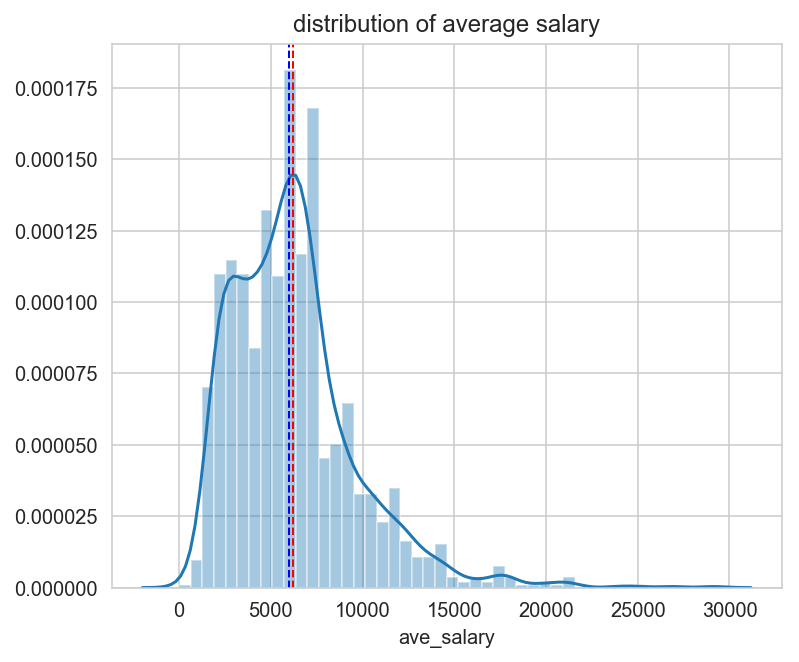

In [42]:
# plot the distribution of average salary after cleaning
plt.figure(figsize=(6,5))
sns.distplot(df["ave_salary"])
plt.title("distribution of average salary")
plt.axvline(df["ave_salary"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df["ave_salary"].median(), color='b', linestyle='dashed', linewidth=1)
plt.show()

In [43]:
df["ave_salary"].median()

6000.0

In [44]:
# as the distribution of average salaries is skewed right, will take median as the threshold
# create new column to show if average salaries are above or below median

df['above_median_salary'] = df['ave_salary'].map(lambda x: 1 if (x >6000) else 0)

In [45]:
df.head()

,coy_name,employment_type,job_title,seniority,salary_type,job_description,requirement,location,urls,min_salary,max_salary,ave_salary,above_median_salary
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,7000.0,6000.0,0
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,6000.0,4100.0,0
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Data Center Engineering Project Engineer APAC,Professional,Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...,9000.0,12000.0,10500.0,1
3,JOHNSON & JOHNSON PTE. LTD.,Permanent,Lead Data Center Engineer,Professional,Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...,5000.0,10000.0,7500.0,1
4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,Data Scientist - Intern (6 months),Fresh/entry level,Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...,800.0,1500.0,1150.0,0


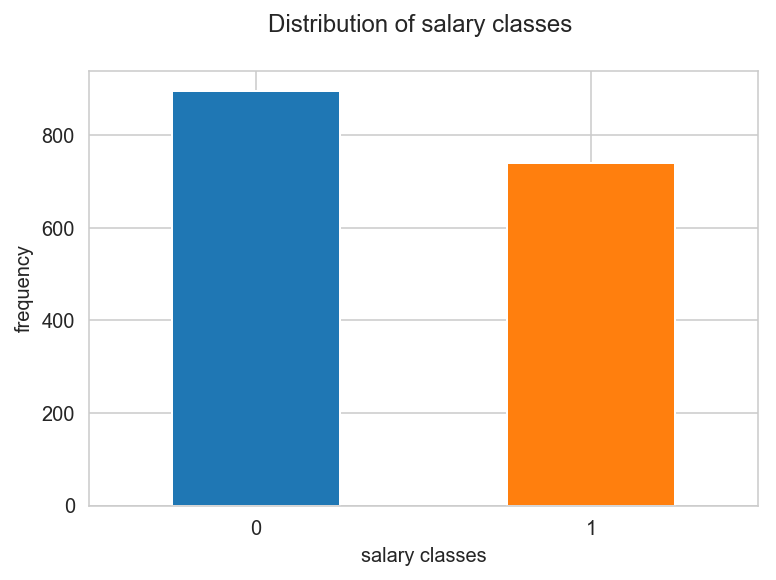

In [46]:
# check distribution of the 2 classes
df['above_median_salary'].value_counts().plot(kind='bar', rot=0,
                                              title='Distribution of salary classes \n') 
plt.xlabel('salary classes')
plt.ylabel('frequency')
plt.show()

In [47]:
# percentage of jobs above and below average median salary
print(('above median: {}').format(len(df[df['above_median_salary']==1])
                                  /len(df['above_median_salary'])))
print(('not above median: {}').format(len(df[df['above_median_salary']==0])
                                      /len(df['above_median_salary'])))


above median: 0.45293398533007334
not above median: 0.5470660146699267


In [48]:
# baseline is class 0, not more than median average salary

In [49]:
# check distribution of seniority vs average monthly salary 
df.seniority.value_counts() 

Professional                                                                   330
Executive                                                                      322
Manager                                                                        176
Senior Executive                                                               170
Non-executive                                                                  154
Junior Executive                                                               111
Middle Management                                                               62
Fresh/entry level                                                               52
Senior Management                                                               43
Executive, Senior Executive                                                     20
Professional, Senior Executive                                                  20
Manager, Professional                                                           14
Fres

In [50]:
# there are 9 levels detailed on the website 
# the different levels may fetch different salaries, let's check that out:

# Senior Management
# Middle Management
# Manager
# Professional
# Senior Executive
# Executive
# Junior Executive
# Non-executive
# Fresh/entry level

In [51]:
# for those jobs that indicate multiple seniority, will just take the first one
df['seniority'] = df['seniority'].map(lambda x: x.split(',')[0])

In [52]:
df['seniority'].unique()

array(['Executive', 'Middle Management', 'Professional',
       'Fresh/entry level', 'Manager', 'Non-executive',
       'Senior Management', 'Senior Executive', 'Junior Executive'],
      dtype=object)

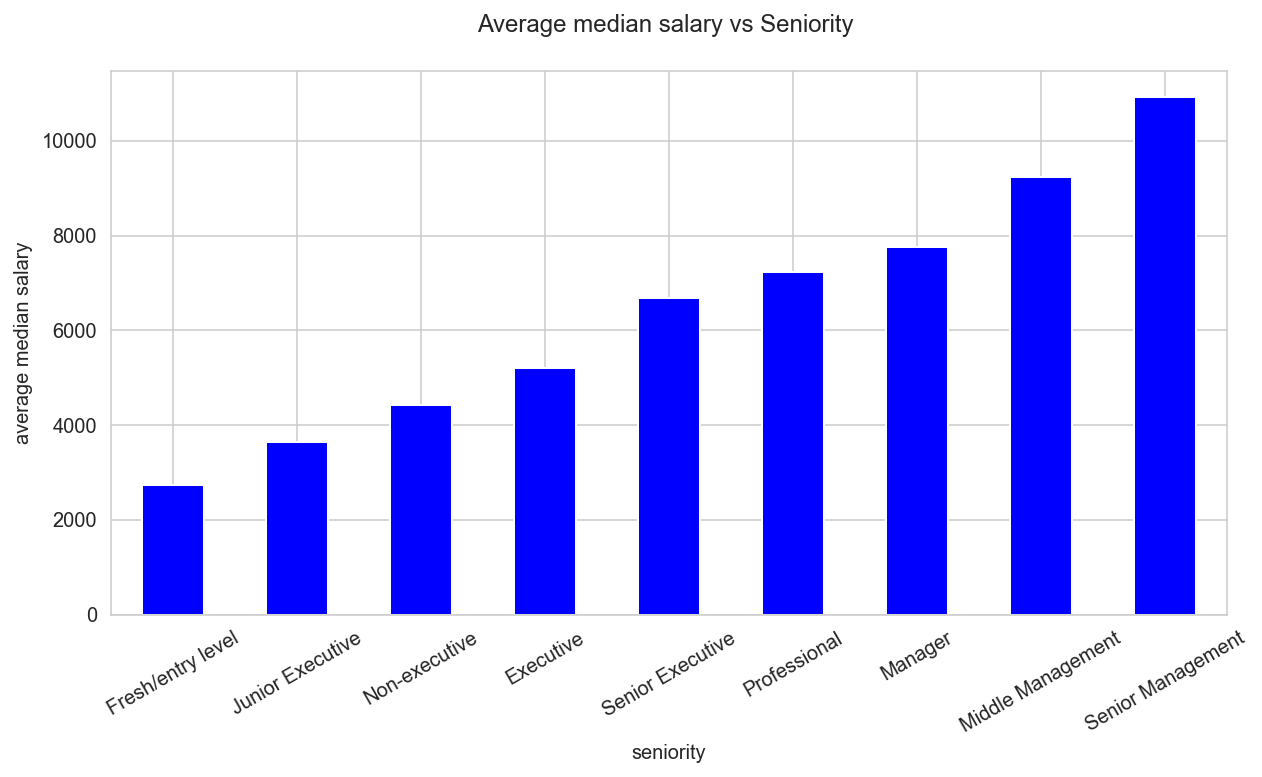

In [53]:
plt.figure(figsize=(10,5))
df.groupby('seniority')['ave_salary'].mean().sort_values().plot(kind='bar',
                                                      legend=False, rot= 30, colormap='winter')
plt.title('Average median salary vs Seniority \n')
plt.ylabel('average median salary')
plt.show()

In [54]:
# As observed the higher the seniority level, the higher the salary 


## QUESTION 1: Factors that impact salary

### Start of Modelling

Will compare two classification models, Logistic Regression and Random Forest to identify factors that impact job salary. Class 1 is above median average salary, Class 0 is equals to or below median average salary.

Will start with <b>seniority</b> then followed by adding <b>job_title</b> using NLP and <b>location</b> if time permits. 

- to try and include industry after re-scraping website

In [55]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, recall_score, accuracy_score

In [56]:
dum = pd.get_dummies(df.seniority)

In [57]:
df = pd.concat([df, dum], axis = 1)

In [58]:
df.head(2)

,coy_name,employment_type,job_title,seniority,salary_type,job_description,requirement,location,urls,min_salary,...,above_median_salary,Executive,Fresh/entry level,Junior Executive,Manager,Middle Management,Non-executive,Professional,Senior Executive,Senior Management
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,...,0,1,0,0,0,0,0,0,0,0
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,...,0,0,0,0,0,1,0,0,0,0


### Modelling on seniority feature

In [59]:
# model 1: logistic regression
features = ['Executive', 'Middle Management', 'Professional',
       'Fresh/entry level', 'Manager', 'Non-executive',
       'Senior Management', 'Senior Executive', 'Junior Executive']
X1 = df[features]
y1 = df['above_median_salary']

In [60]:
# For the train test split we stratify on y to ensure that the distribution of
# classes is the same in both the test set & the training set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=0,
                                                    test_size=0.2, stratify = y1)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6585365853658537

In [61]:
# baseline is class 0, not more than median average salary
1-np.mean(y1)

0.5470660146699267

In [62]:
# use GridSearch to find best parameters
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gs1 = GridSearchCV(lr, gs_params, cv=5, verbose=1)

In [63]:
lr_gs1.fit(X_train, y_train)
print('best_score:', lr_gs1.best_score_, '\n')
print('best parameters:', lr_gs1.best_params_, '\n')
print('best_lr:', lr_gs1.best_estimator_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best_score: 0.6980122324159022 

best parameters: {'C': 0.017073526474706904, 'penalty': 'l2', 'solver': 'liblinear'} 

best_lr: LogisticRegression(C=0.017073526474706904, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.0s finished


In [64]:
# using best estimator to get y_predict and y_predict_proba   
lr_gs1_pred = lr_gs1.best_estimator_.predict(X_test)
lr_gs1_pred_pp1 = lr_gs1.best_estimator_.predict_proba(X_test)

In [65]:
# For class 1 (above median average salary), find the area under the curve.
fpr_logreg1, tpr_logreg1, _ = roc_curve(y_test, lr_gs1_pred_pp1[:,1])
roc_auc_logreg1 = auc(fpr_logreg1, tpr_logreg1)
roc_auc_logreg1

0.6638483746391212

In [66]:
print(classification_report(y_test, lr_gs1_pred))
print('baseline accuracy:', 1-np.mean(y1))
print('mean accuracy:', lr_gs1.best_estimator_.score(X_test, y_test))
print('roc_auc:',roc_auc_logreg1)

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       179
           1       0.58      0.55      0.56       149

   micro avg       0.61      0.61      0.61       328
   macro avg       0.61      0.61      0.61       328
weighted avg       0.61      0.61      0.61       328

baseline accuracy: 0.5470660146699267
mean accuracy: 0.6128048780487805
roc_auc: 0.6638483746391212


In [67]:
# model 2: random forest classifier

In [68]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
# using a 10-fold cross-val 
rfc = RandomForestClassifier(random_state=0)
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print(scores)
print(np.mean(scores))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.6969697  0.59848485 0.79389313 0.67175573 0.76335878 0.7480916
 0.66923077 0.73076923 0.61538462 0.67692308]
0.6964861474403459


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [70]:
rfc.fit(X_train, y_train)
print(rfc.score(X_test,y_test))
rfc_pred = rfc.predict(X_test)
# the .predict_proba() function will return the probabilities as a matrix, 
# the first column is for class 0, the second column is for class 1.
rfc_pred_pp = rfc.predict_proba(X_test)

0.6585365853658537


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [71]:
fpr_rfc1, tpr_rfc1, _ = roc_curve(y_test, rfc_pred_pp[:,1])
roc_auc_rfc1 = auc(fpr_rfc1, tpr_rfc1)
roc_auc_rfc1

0.6937310187094597

In [72]:
print(classification_report(y_test, rfc_pred))
print('baseline accuracy:', 1-np.mean(y1))
print('mean accuracy:', rfc.score(X_test, y_test))
print('roc_auc:',roc_auc_rfc1)

              precision    recall  f1-score   support

           0       0.74      0.57      0.65       179
           1       0.60      0.77      0.67       149

   micro avg       0.66      0.66      0.66       328
   macro avg       0.67      0.67      0.66       328
weighted avg       0.68      0.66      0.66       328

baseline accuracy: 0.5470660146699267
mean accuracy: 0.6585365853658537
roc_auc: 0.6937310187094597


In [73]:
# rfc has higher scores than logistic regression gridsearch

### Modelling on job_title feature

In [74]:
# model 1: logistic regression gridsearch
# applying NLP on job_title 

In [75]:
# import libraries
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
df.head(2)

,coy_name,employment_type,job_title,seniority,salary_type,job_description,requirement,location,urls,min_salary,...,above_median_salary,Executive,Fresh/entry level,Junior Executive,Manager,Middle Management,Non-executive,Professional,Senior Executive,Senior Management
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,...,0,1,0,0,0,0,0,0,0,0
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,...,0,0,0,0,0,1,0,0,0,0


In [77]:
# define feature
X2 = df['job_title']
y2 = df['above_median_salary']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2,
                                                        random_state=0, stratify = y2)

In [78]:
X_train2.head()

1064                     Supply Chain Data / BI Architect
351                                  Operations Executive
1094                              Product Manager  /  PMO
72                                           Data Analyst
672     Supply Chain Analyst (Manufacturing /  Semicon...
Name: job_title, dtype: object

In [79]:
# Setting the vectorizer
cvec1 = CountVectorizer()
# Fitting the vectorizer on our training data
cvec1.fit(X_train2)
# Lets check the length of our data that is in a vectorized state
print('# of features: {}'.format( len(cvec1.get_feature_names()) ))

# of features: 951


In [80]:
# Lets use the stop_words argument to remove words like "and, the, a"
cvec1 = CountVectorizer(stop_words='english')

# Fit our vectorizer using our train data
cvec1.fit(X_train2)

# Check out the length of the vectorized data and shape of train data
print('# of features: {}'.format( len(cvec1.get_feature_names()) )) 

# of features: 924


In [81]:
# Transforming our x_train data using our fit cvec.
# and converting the result to a DataFrame.
# .todense() is just returning it as an array.
X_train2 = pd.DataFrame(cvec1.transform(X_train2).todense(),
                       columns=cvec1.get_feature_names())
    
print(X_train2.shape)

(1308, 924)


In [82]:
X_train2.head(3)

,005ql,009f4,009n0,009ns,10,11,12,123444,123910,124472,...,work,working,workspace,writer,yan,year,years,yi,yield,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Lets look through some of the common words in each class

In [84]:
# For Class 0: Not more than median average salary
# X_train[y_train==i].sum(axis=0) sums each column for each class
# y_train needs to be an array of values, not series
word_counts = X_train2[y_train2.values==0].sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

engineer      125
executive      91
assistant      89
senior         73
manager        72
data           59
analyst        53
research       42
accounts       39
contract       36
officer        36
associate      35
admin          30
specialist     26
consultant     26
sales          24
operations     22
software       21
months         20
developer      20
dtype: int64

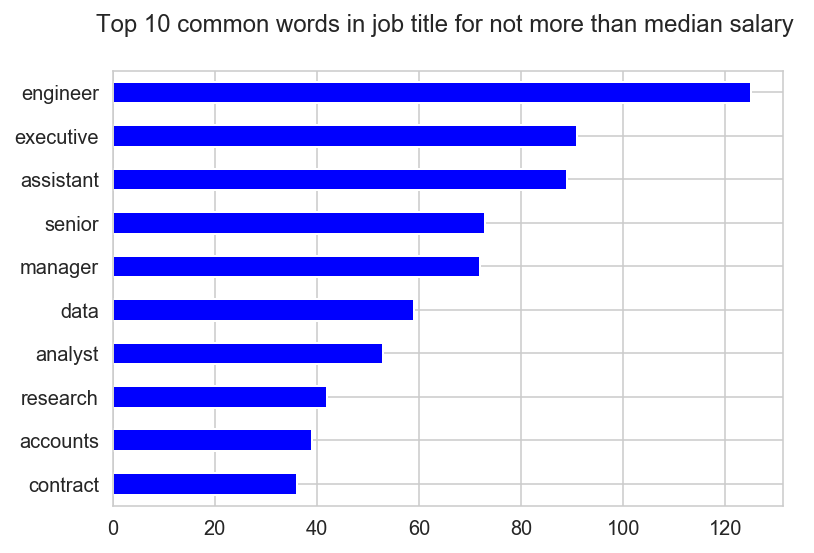

In [85]:
word_counts.sort_values(ascending = False).head(10).sort_values().plot(kind='barh', colormap='winter')
plt.title('Top 10 common words in job title for not more than median salary \n')
plt.show()

In [86]:
# For Class 1: more than median average salary
word_counts = X_train2[y_train2.values==1].sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

manager       127
senior        124
engineer      108
data           97
consultant     51
business       49
analyst        49
software       42
developer      37
scientist      36
lead           28
singapore      26
project        24
architect      22
technology     22
associate      21
research       20
operations     20
product        17
director       15
dtype: int64

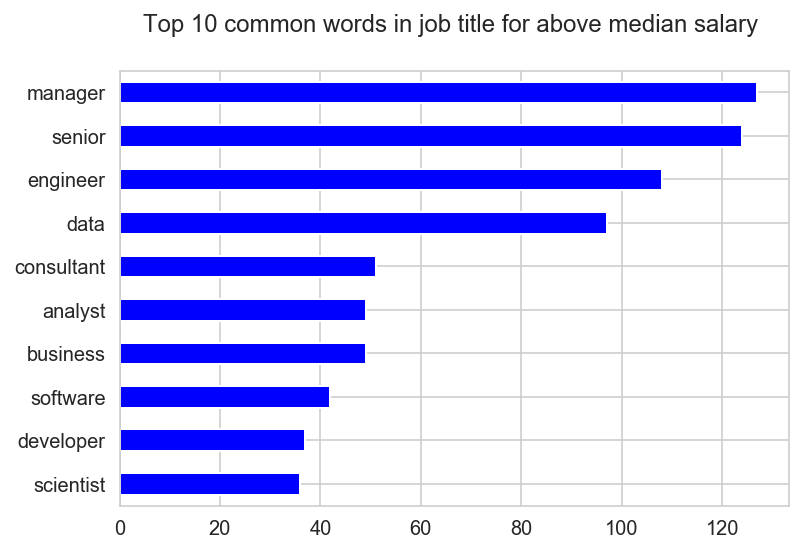

In [87]:
word_counts.sort_values(ascending = False).head(10).sort_values().plot(kind='barh', colormap='winter')
plt.title('Top 10 common words in job title for above median salary \n')
plt.show()

In [88]:
# Converting our vectorized test data to a dataframe
# Using the CVEC which we fit earlier
X_test2 = pd.DataFrame(cvec1.transform(X_test2).todense(),
                      columns=cvec1.get_feature_names())

In [89]:
lr = LogisticRegression()
lr.fit(X_train2, y_train2)
lr.score(X_test2, y_test2)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7530487804878049

In [90]:
# use GridSearch to find best parameters
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gs = GridSearchCV(lr, gs_params, cv=5, verbose=1)

In [91]:
lr_gs.fit(X_train2, y_train2)
print('best_score:', lr_gs.best_score_, '\n')
print('best parameters:', lr_gs.best_params_, '\n')
print('best_lr:', lr_gs.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best_score: 0.7591743119266054 

best parameters: {'C': 0.3944206059437656, 'penalty': 'l2', 'solver': 'liblinear'} 

best_lr: LogisticRegression(C=0.3944206059437656, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   11.8s finished


In [92]:
yhat = lr_gs.best_estimator_.predict(X_test2)
yhat_pp = lr_gs.best_estimator_.predict_proba(X_test2)

In [93]:
# For class 1 (above median average salary), find the area under the curve.
fpr_logreg2, tpr_logreg2, _ = roc_curve(y_test2, yhat_pp[:,1])
roc_auc_logreg2 = auc(fpr_logreg2, tpr_logreg2)
roc_auc_logreg2

0.8214352667691501

In [94]:
print(classification_report(y_test2, yhat))
print('baseline accuracy:', 1-np.mean(y2))
print('mean accuracy:', lr_gs.best_estimator_.score(X_test2, y_test2))
print('roc_auc:',roc_auc_logreg2)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       179
           1       0.73      0.72      0.73       149

   micro avg       0.75      0.75      0.75       328
   macro avg       0.75      0.75      0.75       328
weighted avg       0.75      0.75      0.75       328

baseline accuracy: 0.5470660146699267
mean accuracy: 0.7530487804878049
roc_auc: 0.8214352667691501


In [95]:
# model 2: random forest classifier

In [96]:
# using a 10-fold cross-val 
rfc = RandomForestClassifier(random_state=0)
scores = cross_val_score(rfc, X_train2, y_train2, cv=10)
print(scores)
print(np.mean(scores))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

[0.73484848 0.73484848 0.71755725 0.74045802 0.69465649 0.65648855
 0.76153846 0.7        0.79230769 0.73846154]
0.7271164967348174


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [97]:
rfc.fit(X_train2, y_train2)
print(rfc.score(X_test2,y_test2))
rfc_pred = rfc.predict(X_test2)
# the .predict_proba() function will return the probabilities as a matrix, 
# the first column is for class 0, the second column is for class 1.
rfc_pred_pp = rfc.predict_proba(X_test2)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.725609756097561


In [98]:
fpr_rfc2, tpr_rfc2, _ = roc_curve(y_test2, rfc_pred_pp[:,1])
roc_auc_rfc2 = auc(fpr_rfc2, tpr_rfc2)
roc_auc_rfc2

0.807675002812043

In [99]:
print(classification_report(y_test2, rfc_pred))
print('baseline accuracy:', 1-np.mean(y2))
print('rfc_mean_accuracy:', rfc.score(X_test2, y_test2))
print('rfc_roc_auc:',roc_auc_rfc2)

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       179
           1       0.73      0.64      0.68       149

   micro avg       0.73      0.73      0.73       328
   macro avg       0.73      0.72      0.72       328
weighted avg       0.73      0.73      0.72       328

baseline accuracy: 0.5470660146699267
rfc_mean_accuracy: 0.725609756097561
rfc_roc_auc: 0.807675002812043


In [100]:
# logistic regression gridsearch has better score than random forest 

In [101]:
lr_gs_conmat = pd.DataFrame(np.array(confusion_matrix(y_test, yhat)),
                         index = ['not_above_median', 'above_median'],
                        columns=['predicted_not_above_median','predicted_above_median'])
lr_gs_conmat

,predicted_not_above_median,predicted_above_median
not_above_median,139,40
above_median,41,108


#### Answer

As observed, job title is better in predicting if a job posting will have higher average median salary than seniority as it has a higher mean accuracy and roc_auc score.

In [102]:
# can try repeating above steps adding both job_title and seniority
# X3 = df[['job_title', 'seniority']]
# y3 = df['above_median_salary']

### Modelling on requirement feature to check the key words that hold the greatest significance for above average median salary

In [103]:
# Removing unicode characters in all text in requirement
# "\xa0" : space
# "\u00f8" : latin small Letter o with stroke
# "\uf0b7" : invalid character
# "\t" : TAB character
# "\u00b7" : middle dot
# "\r\n" : window line separator

unicode_char = ["\xa0", "\u00D8", "000", "\uf0b7", "\t", "\u00f8", "\r\n"]
for c in unicode_char:
    df['requirement'] = df['requirement'].map(
        lambda x: str(x).lower().replace(c,''))

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['responsible','role', 'preferred', 'relevant', 'working', 'requirements', 'work']

In [104]:
# tfidf vectorizer with max 200 features, min_df=0.3 and ngram range(1,4)
tfidf = TfidfVectorizer(stop_words=stop, lowercase=True, 
                        strip_accents="unicode", ngram_range=(1,4),
                        max_features=200, min_df=0.3, max_df=1.0)
X4a = tfidf.fit_transform(df['requirement'])
columns  =  np.array(tfidf.get_feature_names())
X4a

<1636x14 sparse matrix of type '<class 'numpy.float64'>'
	with 10329 stored elements in Compressed Sparse Row format>

In [105]:
tfidf.vocabulary_

{'degree': 4,
 'years': 12,
 'experience': 5,
 'data': 3,
 'knowledge': 7,
 'business': 1,
 'team': 11,
 'years experience': 13,
 'strong': 10,
 'management': 8,
 'skills': 9,
 'ability': 0,
 'communication': 2,
 'good': 6}

In [106]:
# .todense() returns a matrix rather than an array
# add index of original df to pull out common words for each class
word_counts = pd.DataFrame(X4a.todense(), 
                    columns=tfidf.get_feature_names(), index=df.index)
word_counts.sum().sort_values(ascending = False) # no. of times word appears in descending

experience          569.193917
skills              351.277100
data                279.575576
knowledge           261.468674
ability             244.252327
good                236.846996
years               236.761148
strong              228.397534
degree              217.220565
management          208.205884
team                192.545822
business            182.338435
communication       171.159235
years experience    167.560073
dtype: float64

In [107]:
# tfidf vectorizer with max 200 features
# changing min_df, max_df and ngram_range
tfidf = TfidfVectorizer(stop_words=stop, lowercase=True, 
                        strip_accents="unicode", ngram_range=(2,4),
                        max_features=200, min_df=0.2, max_df=0.9)
X4b = tfidf.fit_transform(df['requirement'])
columns  =  np.array(tfidf.get_feature_names())
X4b

<1636x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1007 stored elements in Compressed Sparse Row format>

In [108]:
tfidf.vocabulary_

{'years experience': 1, 'communication skills': 0}

In [109]:
# .todense() returns a matrix rather than an array
# add index of original df to pull out common words for each class
word_counts = pd.DataFrame(X4b.todense(), 
                    columns=tfidf.get_feature_names(), index=df.index)
word_counts.sum().sort_values(ascending = False) # no. of times word appears in descending

years experience        519.041194
communication skills    382.072579
dtype: float64

In [110]:
# 'years experience' and 'communication skills' have the greatest significance 
# for above average median salary 

In [111]:
y4 = df['above_median_salary']
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X4a, y4, random_state=0, test_size=0.2, stratify=y4)

In [112]:
# model 1: logistic regression gridsearch for modelling on tfidf features 
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train4, y_train4)
lr.score(X_test4, y_test4)

0.6646341463414634

In [113]:
# use GridSearch to find best parameters
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gs = GridSearchCV(lr, gs_params, cv=5, verbose=1)

In [114]:
lr_gs.fit(X_train4, y_train4)
print('best_score:', lr_gs.best_score_, '\n')
print('best parameters:', lr_gs.best_params_, '\n')
print('best_lr:', lr_gs.best_estimator_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best_score: 0.6796636085626911 

best parameters: {'C': 0.7924828983539169, 'penalty': 'l1', 'solver': 'liblinear'} 

best_lr: LogisticRegression(C=0.7924828983539169, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


In [115]:
lr_gs_pred = lr_gs.best_estimator_.predict(X_test4)
lr_gs_pred_pp1 = lr_gs.best_estimator_.predict_proba(X_test4)

fpr_lr_gs, tpr_lr_gs, _ = roc_curve(y_test4, lr_gs_pred_pp1[:,1])
roc_auc_lr_gs = auc(fpr_lr_gs, tpr_lr_gs)
roc_auc_lr_gs

0.6902253383825128

In [116]:
print(classification_report(y_test4, lr_gs_pred))
print('baseline recall:', 1-np.mean(y4))
print('mean accuracy:', lr_gs.best_estimator_.score(X_test4, y_test4))
print('roc_auc:',roc_auc_lr_gs)

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       179
           1       0.63      0.62      0.62       149

   micro avg       0.66      0.66      0.66       328
   macro avg       0.66      0.66      0.66       328
weighted avg       0.66      0.66      0.66       328

baseline recall: 0.5470660146699267
mean accuracy: 0.6615853658536586
roc_auc: 0.6902253383825128


In [117]:
# accuracy is higher than baseline for logistic regression
# Note that score on X4b is lower

In [118]:
# model 2: Naive Bayes MultinomialNB on tfidf features 

clf = MultinomialNB().fit(X4a, y4)
scores = cross_val_score(clf, X4a, y4, cv=5)
print(scores)
print(np.mean(scores))

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X4a, y4, random_state=0, test_size=0.2, stratify=y4)

[0.60365854 0.62691131 0.55963303 0.55963303 0.58103976]
0.5861751323935257


In [119]:
# check columns are the same
# preset max 200 features
X_train4.shape, X_test4.shape

((1308, 14), (328, 14))

In [120]:
clf = MultinomialNB().fit(X_train4, y_train4)
clf_pred = clf.predict(X_test4)
clf_pred_pp = clf.predict_proba(X_test4)

clf.score(X_test4, y_test4)

0.6067073170731707

In [121]:
fpr_clf, tpr_clf, _ = roc_curve(y_test4, clf_pred_pp[:,1])
roc_auc_mnb = auc(fpr_clf, tpr_clf)
roc_auc_mnb

0.6373589291740094

In [122]:
print(classification_report(y_test4, clf_pred))
print('baseline recall:', 1-np.mean(y4))
print('mean accuracy:', clf.score(X_test4, y_test4))
# same as above print('accuracy score:', accuracy_score(y_test5, clf2_pred) )
print('roc_auc:',roc_auc_mnb)

              precision    recall  f1-score   support

           0       0.59      0.88      0.71       179
           1       0.66      0.28      0.39       149

   micro avg       0.61      0.61      0.61       328
   macro avg       0.63      0.58      0.55       328
weighted avg       0.62      0.61      0.57       328

baseline recall: 0.5470660146699267
mean accuracy: 0.6067073170731707
roc_auc: 0.6373589291740094


In [123]:
# logistic regression model has higher accuracy score, precision and recall 
# than MultinomialNB

In [124]:
# confusion matrix for logistic regression model
lr_gs_conmat = pd.DataFrame(np.array(confusion_matrix(y_test4, lr_gs_pred)),
                         index = ['not_above_median', 'above_median'],
                        columns=['predicted_not_above_median','predicted_above_median'])
lr_gs_conmat

,predicted_not_above_median,predicted_above_median
not_above_median,125,54
above_median,57,92


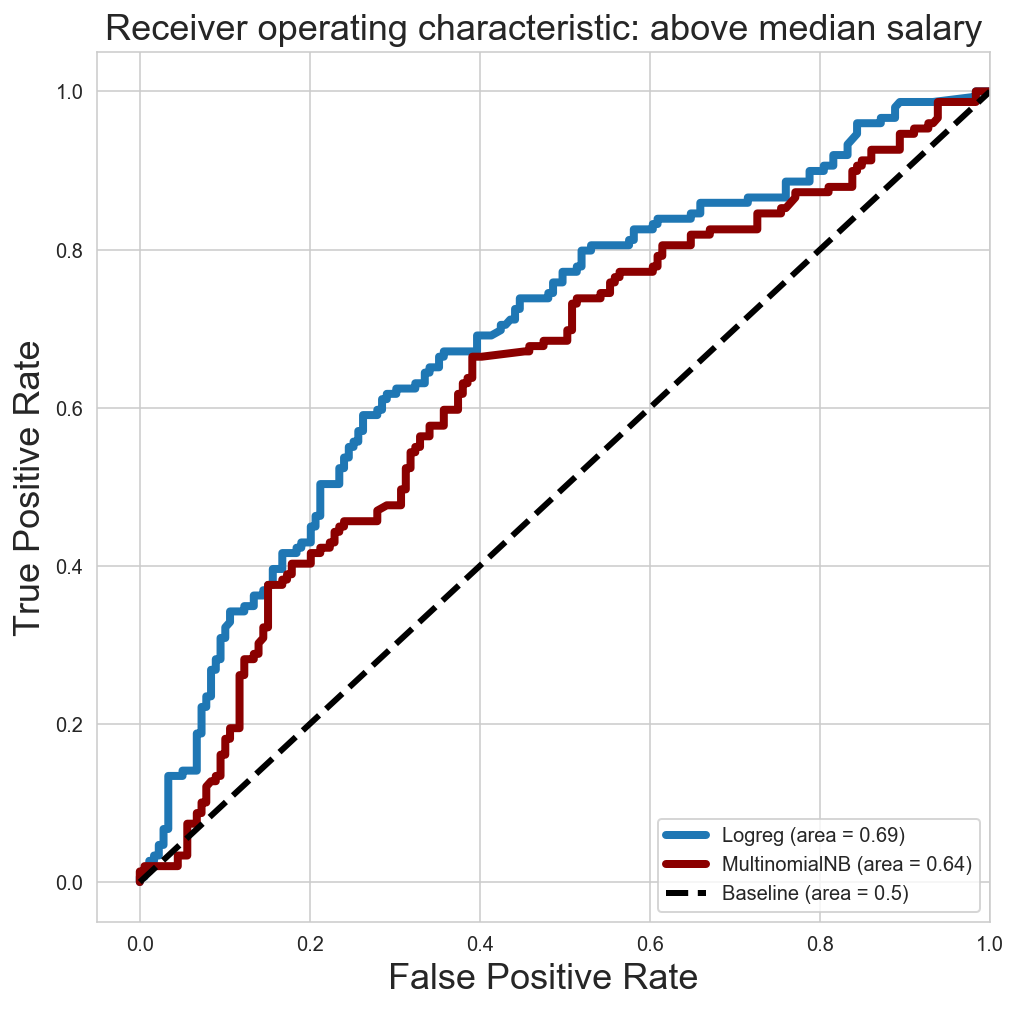

In [125]:
plt.figure(figsize=[8,8])
# roc_auc_lr_gs = auc(fpr_lr_gs, tpr_lr_gs)
plt.plot(fpr_lr_gs, tpr_lr_gs, label='Logreg (area = %0.2f)' % roc_auc_lr_gs,
         linewidth=4)
# roc_auc_mnb = auc(fpr_clf, tpr_clf)
plt.plot(fpr_clf, tpr_clf, label='MultinomialNB (area = %0.2f)' % roc_auc_mnb, 
         linewidth=4, color='darkred')
plt.plot([0, 1], [0, 1], 'k--', linewidth=3, label='Baseline (area = 0.5)')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: above median salary', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:

- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


#### Try to identify components of a job posting that distinguishes data scientists from other data jobs

In [126]:
# convert job_title column to lowercase
df['job_title'] = df['job_title'].str.lower()

In [127]:
# check number of job titles that contain scientist and the percentage 
print(df['job_title'].str.contains('scientist').sum())
print(df['job_title'].str.contains('scientist').sum()/len(df))

54
0.03300733496332518


In [128]:
# only 3.3% are data scientist roles

In [129]:
index3 = df[df['job_title'].str.contains('scientist')].index

In [130]:
df['is_scientist'] = 0
df.loc[index3,'is_scientist'] = 1

In [131]:
df.head(3)

,coy_name,employment_type,job_title,seniority,salary_type,job_description,requirement,location,urls,min_salary,...,Executive,Fresh/entry level,Junior Executive,Manager,Middle Management,Non-executive,Professional,Senior Executive,Senior Management,is_scientist
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,data engineer,Executive,Monthly,Mission As part of becoming one of the members...,competencies degree in computer science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,...,1,0,0,0,0,0,0,0,0,0
1,PORTCAST PTE. LTD.,Full Time,data scientist,Middle Management,Monthly,"In this role, you will be responsible for anal...",● comfortable working with large amounts of da...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,...,0,0,0,0,1,0,0,0,0,1
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,data center engineering project engineer apac,Professional,Monthly,The Data Center Global Services (DCGS) team is...,basic qualifications - minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...,9000.0,...,0,0,0,0,0,0,1,0,0,0


In [132]:
# import libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression

In [133]:
# Removing unicode characters in all text in job description
# "\xa0" : space
# "\u00f8" : latin small Letter o with stroke
# "\uf0b7" : invalid character
# "\t" : TAB character
# "\u00b7" : middle dot
# "\r\n" : window line separator

unicode_char = ["\xa0", "\u00D8", "000", "\uf0b7", "\t", "\u00f8", "\r\n"]
for c in unicode_char:
    df['job_description'] = df['job_description'].map(
        lambda x: str(x).lower().replace(c,''))

In [134]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['responsible','role']

In [135]:
# tfidf vectorizer with max 200 features
tfidf = TfidfVectorizer(stop_words=stop, lowercase=True, 
                        strip_accents="unicode", ngram_range=(1,2), max_features=200)
X5 = tfidf.fit_transform(df['job_description'])
columns  =  np.array(tfidf.get_feature_names())
X5

<1636x200 sparse matrix of type '<class 'numpy.float64'>'
	with 54258 stored elements in Compressed Sparse Row format>

In [136]:
tfidf.vocabulary_

{'part': 115,
 'one': 109,
 'new': 108,
 'data': 37,
 'team': 176,
 'within': 196,
 'business': 20,
 'well': 195,
 'work': 197,
 'closely': 25,
 'stakeholders': 166,
 'help': 69,
 'design': 41,
 'build': 18,
 'company': 28,
 'product': 134,
 'customers': 36,
 'platform': 124,
 'planning': 122,
 'infrastructure': 80,
 'support': 172,
 'review': 154,
 'processes': 133,
 'plan': 121,
 'development': 44,
 'implementation': 73,
 'documentation': 46,
 'across': 4,
 'functional': 63,
 'teams': 177,
 'using': 192,
 'conduct': 31,
 'maintain': 93,
 'quality': 141,
 'time': 183,
 'analysis': 7,
 'customer': 35,
 'projects': 138,
 'analytics': 8,
 'improve': 74,
 'required': 150,
 'end': 50,
 'understanding': 188,
 'needs': 106,
 'developing': 43,
 'understand': 187,
 'requirements': 151,
 'provide': 139,
 'relevant': 146,
 'insights': 82,
 'able': 1,
 'solutions': 165,
 'experience': 59,
 'learning': 90,
 'develop': 42,
 'ability': 0,
 'building': 19,
 'applications': 10,
 'cloud': 26,
 'service

In [137]:
# .todense() returns a matrix rather than an array
# add index of original df to pull out common words for each class
word_counts = pd.DataFrame(X5.todense(), 
                    columns=tfidf.get_feature_names(), index=df.index)
word_counts.sum().sort_values(ascending = False) # no. of times word appears in descending order

data             160.567010
business         109.664058
team              95.392660
support           94.494190
work              91.508817
management        83.230057
design            80.482048
project           80.014049
development       68.830933
ensure            68.509190
provide           65.489874
experience        64.083668
sales             63.492975
analysis          61.887032
system            61.073125
research          60.478823
new               59.922644
process           59.603359
customer          59.514563
solutions         58.439401
develop           58.252394
product           58.045173
projects          57.353841
requirements      56.142701
perform           56.088650
technical         55.286221
duties            53.933571
clients           52.689347
systems           52.467185
assist            51.913843
                    ...    
monitor           23.534277
opportunities     23.469801
plans             23.335168
include           23.053636
users             23

In [138]:
word_counts.head()

,ability,able,accounting,accounts,across,activities,also,analysis,analytics,application,...,user,users,using,value,various,well,within,work,working,world
0,0.000000,0.000000,0.0,0.0,0.114112,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.119155,0.000000,0.0,0.112248,0.105731,0.071086,0.0,0.0
1,0.113584,0.119093,0.0,0.0,0.000000,0.0,0.000000,0.169584,0.220421,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.096697,0.000000,0.000000,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.109664,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.107873,0.203219,0.000000,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.050713,0.0,0.057707,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.093978,0.063184,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.182991,0.000000,0.0,...,0.0,0.0,0.000000,0.266376,0.0,0.000000,0.000000,0.000000,0.0,0.0


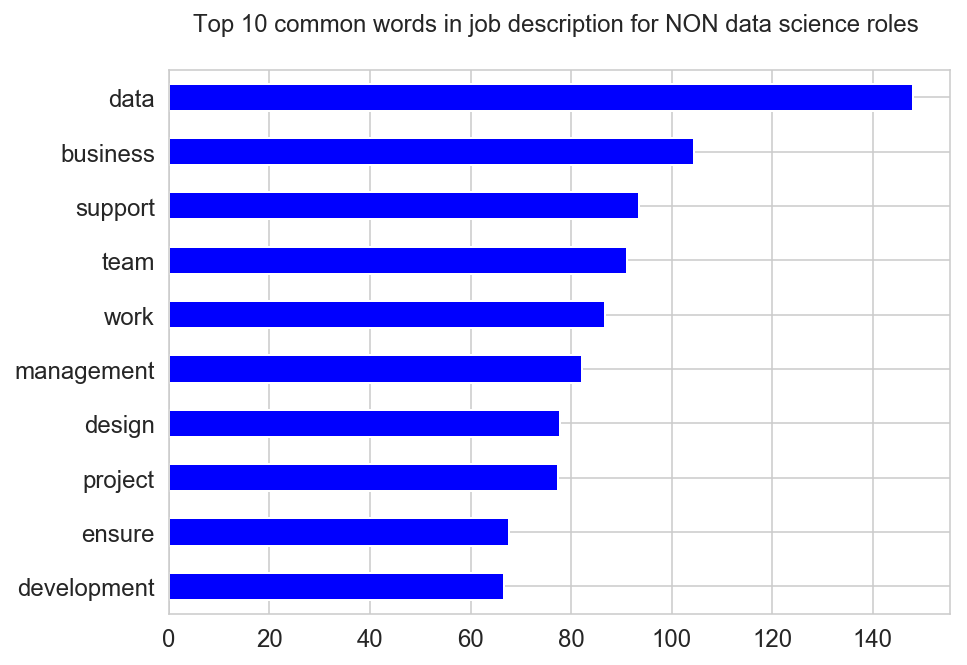

In [139]:
# common words for non data science roles
# X[y==i].sum(axis=0) sums each column for each class
word_counts[df['is_scientist'] == 0].sum(axis=0).sort_values(
    ascending = False).head(10).sort_values().plot(
    kind='barh',colormap='winter', figsize=(7,5))
plt.title('Top 10 common words in job description for NON data science roles \n', size=12)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

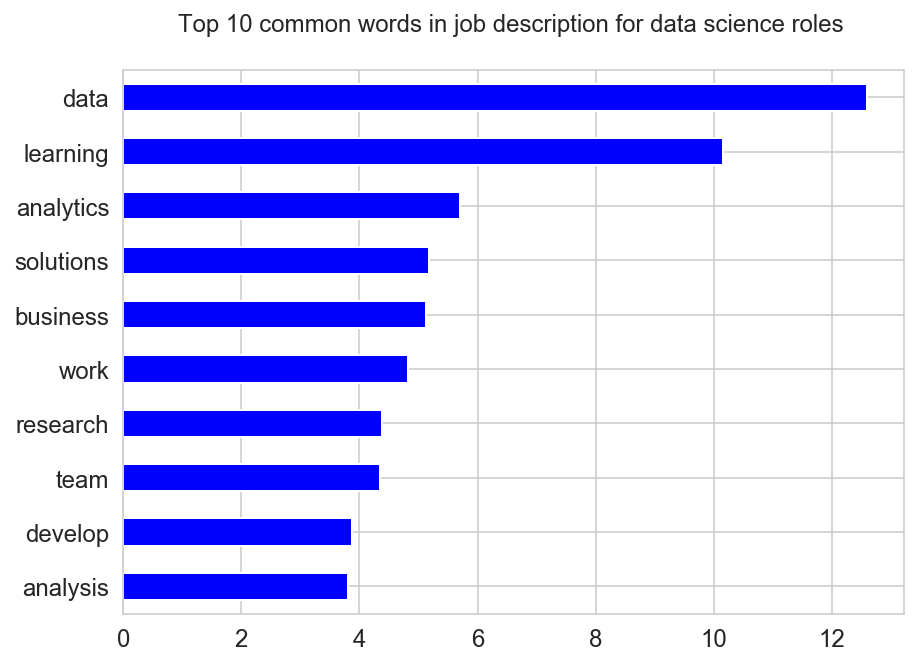

In [140]:
# common words for data science roles
word_counts[df['is_scientist'] == 1].sum(axis=0).sort_values(
    ascending = False).head(10).sort_values().plot(
    kind='barh',colormap='winter', figsize=(7,5))
plt.title('Top 10 common words in job description for data science roles \n', size=12)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [141]:
word_counts[df['is_scientist'] == 1].sum(axis=0).sort_values(ascending = False).index[:10]

Index(['data', 'learning', 'analytics', 'solutions', 'business', 'work',
       'research', 'team', 'develop', 'analysis'],
      dtype='object')

#### The top 10 words in job description for data science roles:
'data', 'learning', 'analytics', 'solutions', 'business', 'work',
       'research', 'team', 'develop', 'analysis'

In [142]:
# using naive-bayes BernoulliNB to predict if job posting is data scientist

In [143]:
# model 1: Naive Bayes BernoulliNB on tfidf features 
X5 
y5 = df['is_scientist']
clf2 = BernoulliNB().fit(X5, y5)
scores = cross_val_score(clf2, X5, y5, cv=5)
print(scores)
print(np.mean(scores))

[0.88109756 0.91158537 0.91743119 0.90519878 0.93865031]
0.9107926405993391


In [144]:
# baseline is class 0, not data scientist
1. - np.mean(y5)

0.9669926650366748

In [145]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X5, y5, random_state=0, test_size=0.2, stratify = y5)

In [146]:
# check columns are the same
# preset max 200 features
X_train5.shape, X_test5.shape

((1308, 200), (328, 200))

In [147]:
clf2 = BernoulliNB().fit(X_train5, y_train5)
clf2_pred = clf2.predict(X_test5)
clf2_pred_pp = clf2.predict_proba(X_test5)

In [148]:
clf2.score(X_test5, y_test5)

0.9329268292682927

In [149]:
fpr_clf2, tpr_clf2, _ = roc_curve(y_test5, clf2_pred_pp[:,1])
roc_auc_bnb1 = auc(fpr_clf2, tpr_clf2)
roc_auc_bnb1

0.9102380269572699

In [150]:
print(classification_report(y_test5, clf2_pred))
print('baseline accuracy:', 1-np.mean(y5))
print('mean accuracy:', clf2.score(X_test5, y_test5))
print('roc_auc:',roc_auc_bnb1)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       317
           1       0.30      0.73      0.42        11

   micro avg       0.93      0.93      0.93       328
   macro avg       0.64      0.83      0.69       328
weighted avg       0.97      0.93      0.95       328

baseline accuracy: 0.9669926650366748
mean accuracy: 0.9329268292682927
roc_auc: 0.9102380269572699


In [151]:
# this model is able to predict both majority and minority class with good precision 
# and recall with a high roc_auc score although the mean accuracy is slightly lower
# than baseline

In [152]:
clf2_conmat = pd.DataFrame(np.array(confusion_matrix(y_test5, clf2_pred)),
                         index = ['not_data_scientist', 'data_scientist'],
                        columns=['predicted_not_data_scientist','predicted_data_scientist'])
clf2_conmat

,predicted_not_data_scientist,predicted_data_scientist
not_data_scientist,298,19
data_scientist,3,8


In [153]:
# model 2: Naive Bayes MultinomialNB on tfidf features 
X5 
y5 = df['is_scientist']
clf4 = MultinomialNB().fit(X5, y5)
scores = cross_val_score(clf2, X5, y5, cv=5)
print(scores)
print(np.mean(scores))

[0.88109756 0.91158537 0.91743119 0.90519878 0.93865031]
0.9107926405993391


In [154]:
clf4 = MultinomialNB().fit(X_train5, y_train5)
clf4_pred = clf4.predict(X_test5)
clf4_pred_pp = clf4.predict_proba(X_test5)
clf4.score(X_test5, y_test5)

0.9664634146341463

In [155]:
fpr_clf4, tpr_clf4, _ = roc_curve(y_test5, clf4_pred_pp[:,1])
roc_auc_mnb1 = auc(fpr_clf4, tpr_clf4)
roc_auc_mnb1

0.9400630914826499

In [156]:
print(classification_report(y_test5, clf4_pred))
print('baseline accuracy:', 1-np.mean(y5))
print('mean accuracy:', clf4.score(X_test5, y_test5))
print('roc_auc:',roc_auc_mnb1)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       317
           1       0.00      0.00      0.00        11

   micro avg       0.97      0.97      0.97       328
   macro avg       0.48      0.50      0.49       328
weighted avg       0.93      0.97      0.95       328

baseline accuracy: 0.9669926650366748
mean accuracy: 0.9664634146341463
roc_auc: 0.9400630914826499


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [157]:
clf4_conmat = pd.DataFrame(np.array(confusion_matrix(y_test5, clf4_pred)),
                         index = ['not_data_scientist', 'data_scientist'],
                        columns=['predicted_not_data_scientist','predicted_data_scientist'])
clf4_conmat

,predicted_not_data_scientist,predicted_data_scientist
not_data_scientist,317,0
data_scientist,11,0


In [158]:
# MultinomialNB model has higher accuracy and roc_auc scores but poor precision and recall
# for predicting data scientist roles as compared to BernoulliNB model

In [159]:
# model 3: logistic regression gridsearch for modelling on tfidf features 
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train5, y_train5)
lr.score(X_test5, y_test5)

0.9664634146341463

In [160]:
# use GridSearch to find best parameters
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gs2 = GridSearchCV(lr, gs_params, cv=5, verbose=1)

In [161]:
lr_gs2.fit(X_train5, y_train5)
print('best_score:', lr_gs2.best_score_, '\n')
print('best parameters:', lr_gs2.best_params_, '\n')
print('best_lr:', lr_gs2.best_estimator_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best_score: 0.9671253822629969 

best parameters: {'C': 1e-05, 'penalty': 'l1', 'solver': 'liblinear'} 

best_lr: LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


In [162]:
lr_gs2_pred = lr_gs2.best_estimator_.predict(X_test5)
lr_gs2_pred_pp1 = lr_gs2.best_estimator_.predict_proba(X_test5)

In [163]:
# For class 1 (data scientist), find the area under the curve.
fpr_logreg3, tpr_logreg3, _ = roc_curve(y_test5, lr_gs2_pred_pp1[:,1])
roc_auc_logreg3 = auc(fpr_logreg3, tpr_logreg3)
roc_auc_logreg3

0.5

In [164]:
print(classification_report(y_test5, lr_gs2_pred))
print('baseline accuracy:', 1-np.mean(y5))
print('mean accuracy:', lr_gs2.best_estimator_.score(X_test5, y_test5))
print('roc_auc:',roc_auc_logreg3)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       317
           1       0.00      0.00      0.00        11

   micro avg       0.97      0.97      0.97       328
   macro avg       0.48      0.50      0.49       328
weighted avg       0.93      0.97      0.95       328

baseline accuracy: 0.9669926650366748
mean accuracy: 0.9664634146341463
roc_auc: 0.5


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [165]:
# logistic regression with gridsearch performs worse than BernoulliNB and MultinomialNB. 
# It is unable to predict any data scientist roles. Roc_auc score is 0.5 (by chance). 

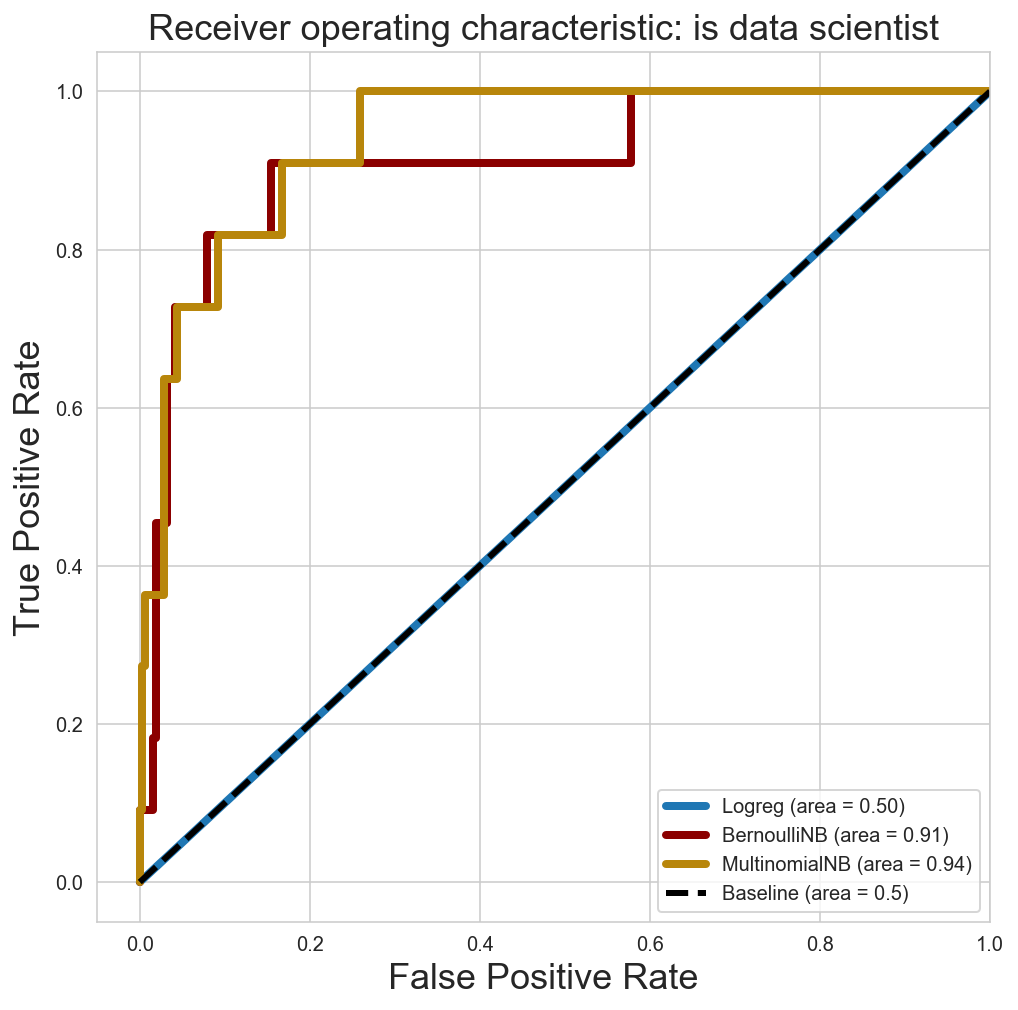

In [166]:
plt.figure(figsize=[8,8])
# roc_auc_logreg3 = auc(fpr_logreg3, tpr_logreg3)
plt.plot(fpr_logreg3, tpr_logreg3, label='Logreg (area = %0.2f)' % roc_auc_logreg3,
         linewidth=4)
# roc_auc_bnb1 = auc(fpr_clf2, tpr_clf2)
plt.plot(fpr_clf2, tpr_clf2, label='BernoulliNB (area = %0.2f)' % roc_auc_bnb1, 
         linewidth=4, color='darkred')
# roc_auc_mnb1 = auc(fpr_clf4, tpr_clf4)
plt.plot(fpr_clf4, tpr_clf4, label='MultinomialNB (area = %0.2f)' % roc_auc_mnb1, 
         linewidth=4, color='darkgoldenrod')
plt.plot([0, 1], [0, 1], 'k--', linewidth=3, label='Baseline (area = 0.5)')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is data scientist', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [167]:
# BernoulliNB model is the preferred model as it is the only model that can predict the
# minority class, data scientist roles

#### Try to identify important features for distinguishing junior vs. senior positions

In [168]:
# X5 = tfidf.fit_transform(df['job_description'])
X6 = X5

In [169]:
# convert to lowercase
df['seniority'] = df['seniority'].map(lambda x: x.lower())

In [170]:
df['seniority'].unique()

array(['executive', 'middle management', 'professional',
       'fresh/entry level', 'manager', 'non-executive',
       'senior management', 'senior executive', 'junior executive'],
      dtype=object)

In [171]:
y6 = df['seniority']

In [172]:
y6.value_counts()

professional         384
executive            359
manager              209
senior executive     170
non-executive        159
junior executive     114
fresh/entry level    105
middle management     80
senior management     56
Name: seniority, dtype: int64

In [173]:
# baseline is professional level
len(y6[y6=='professional'])/len(y6)

0.23471882640586797

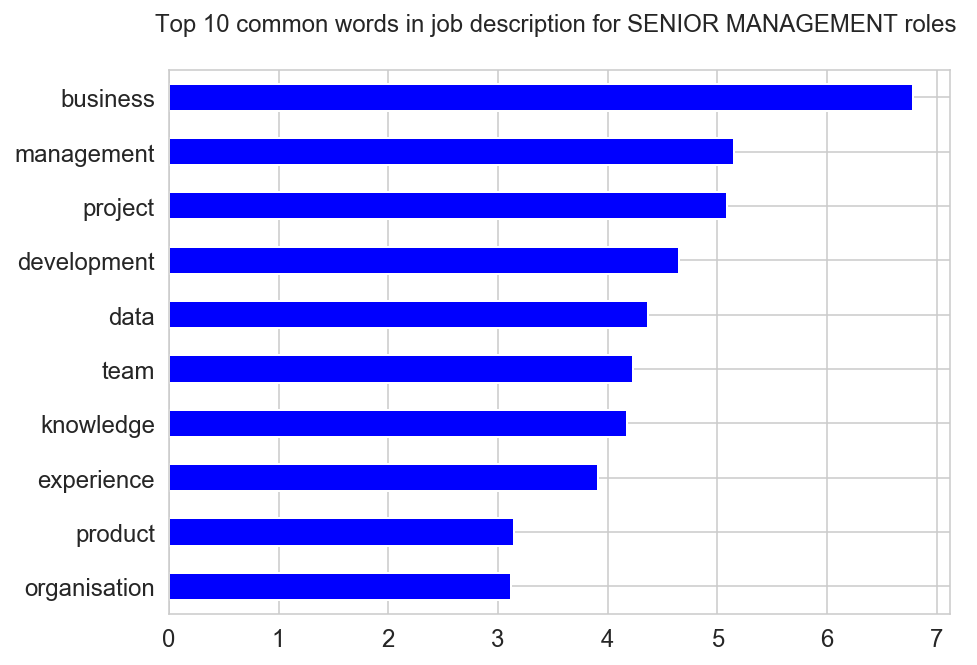

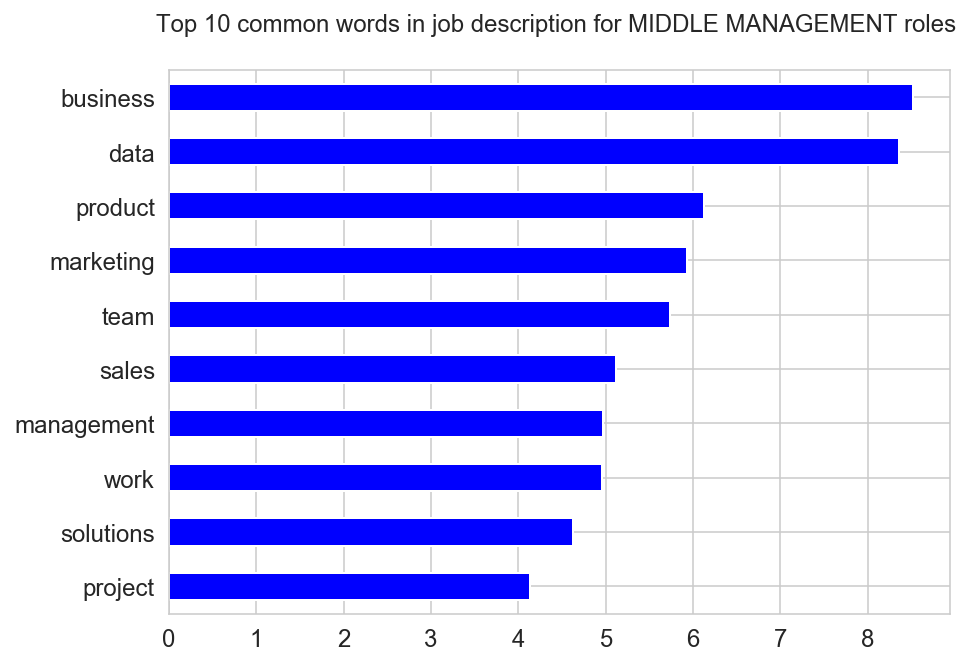

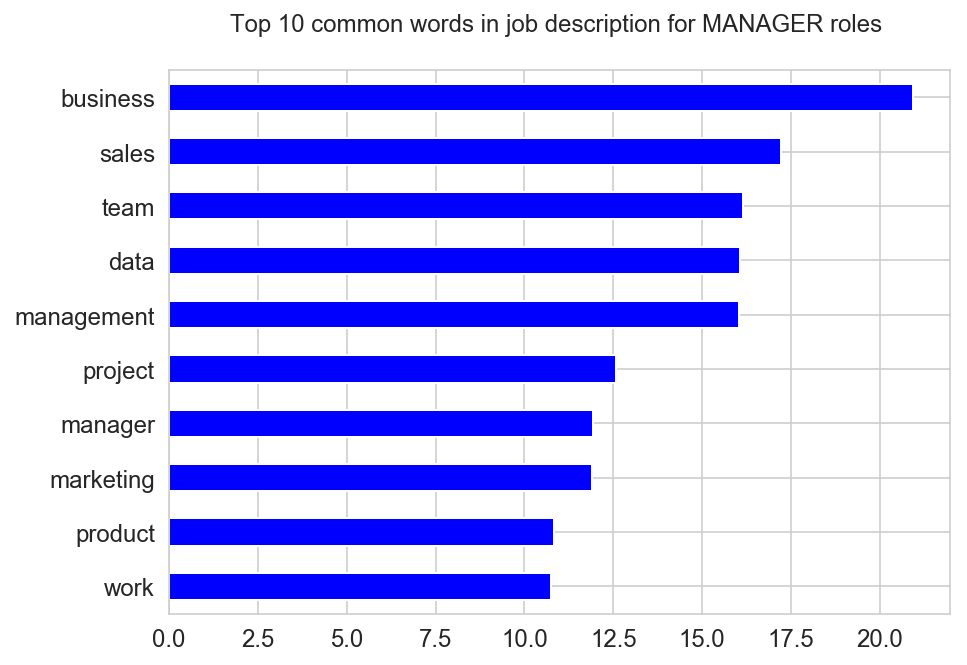

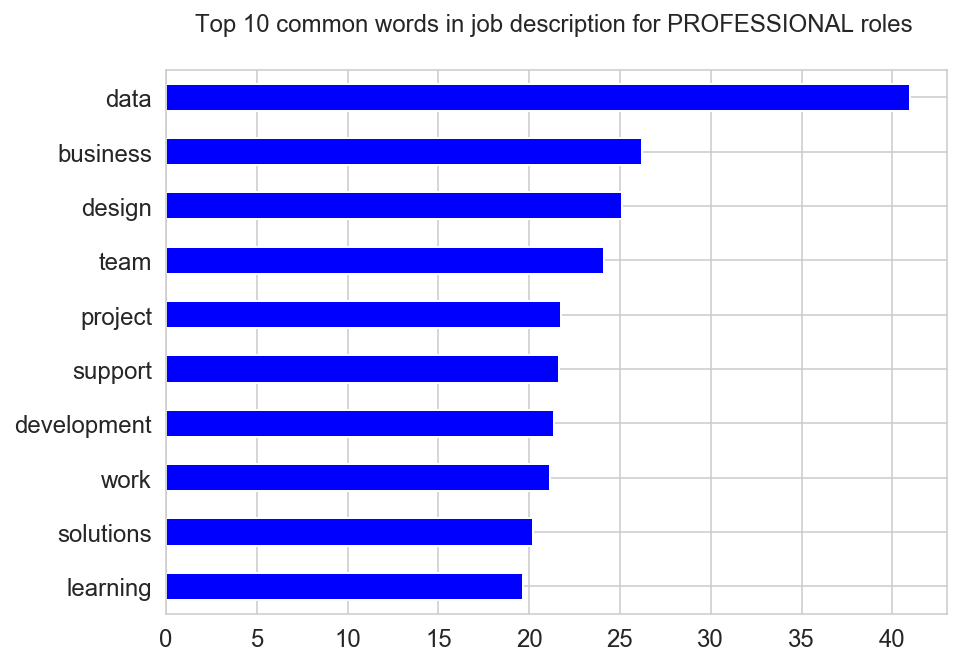

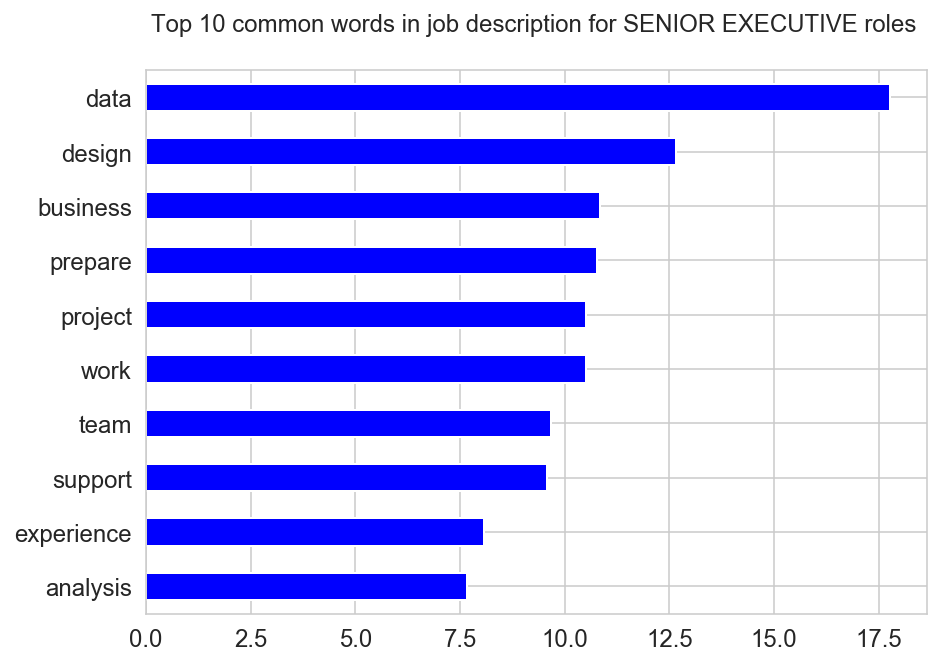

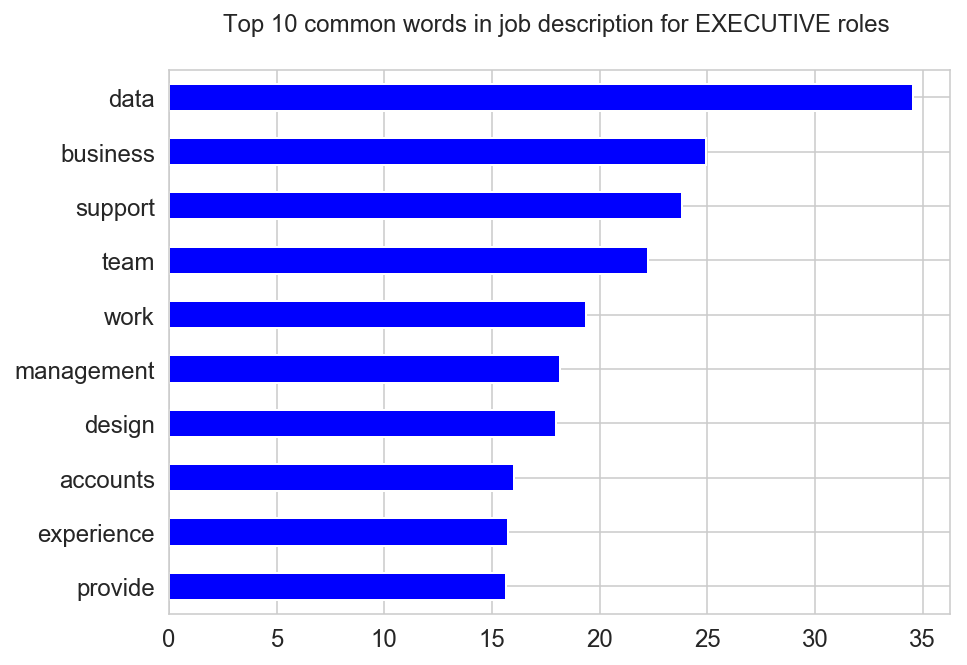

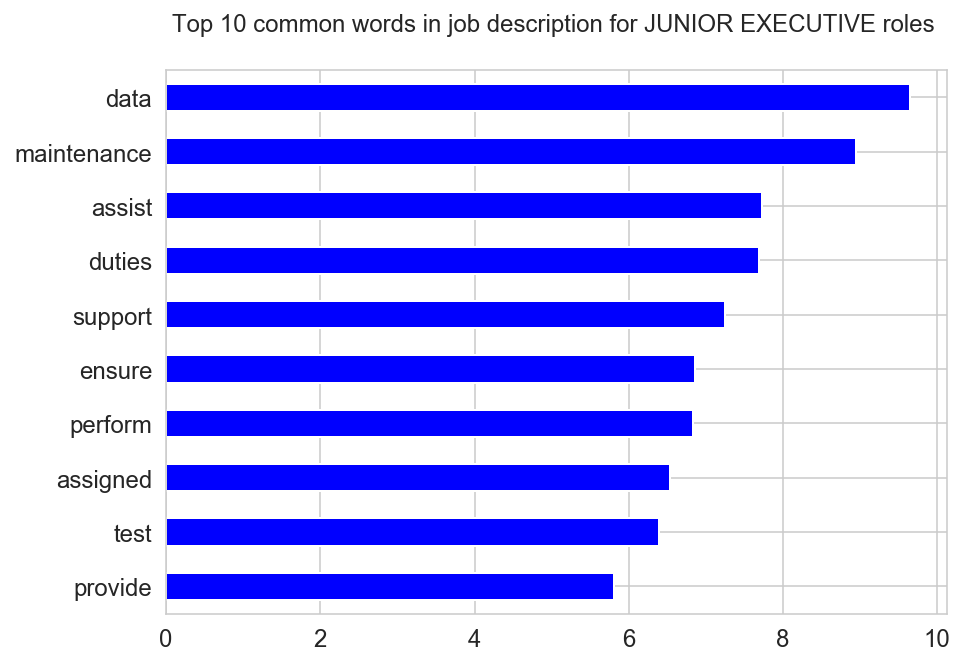

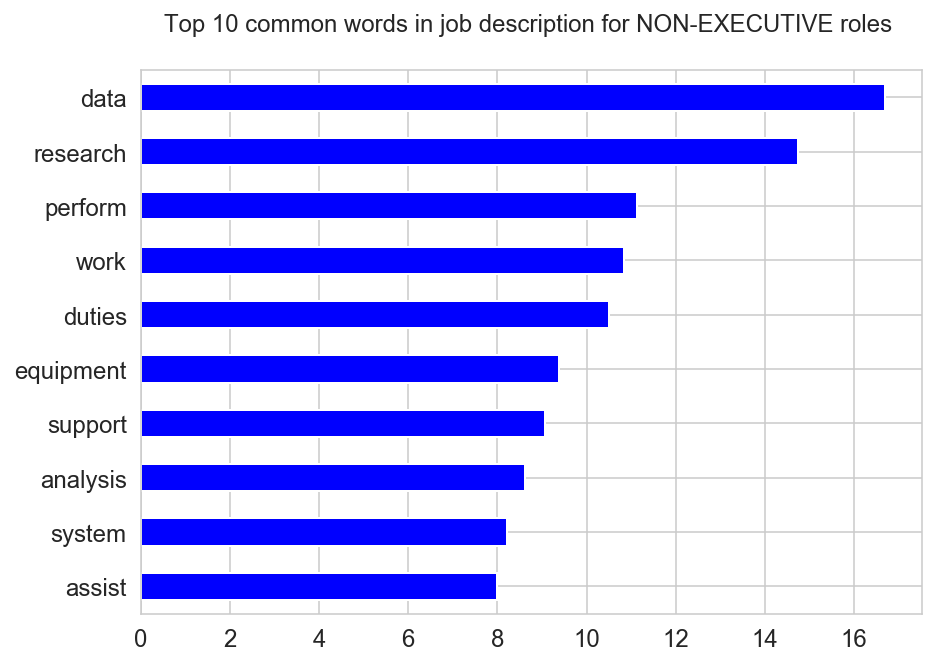

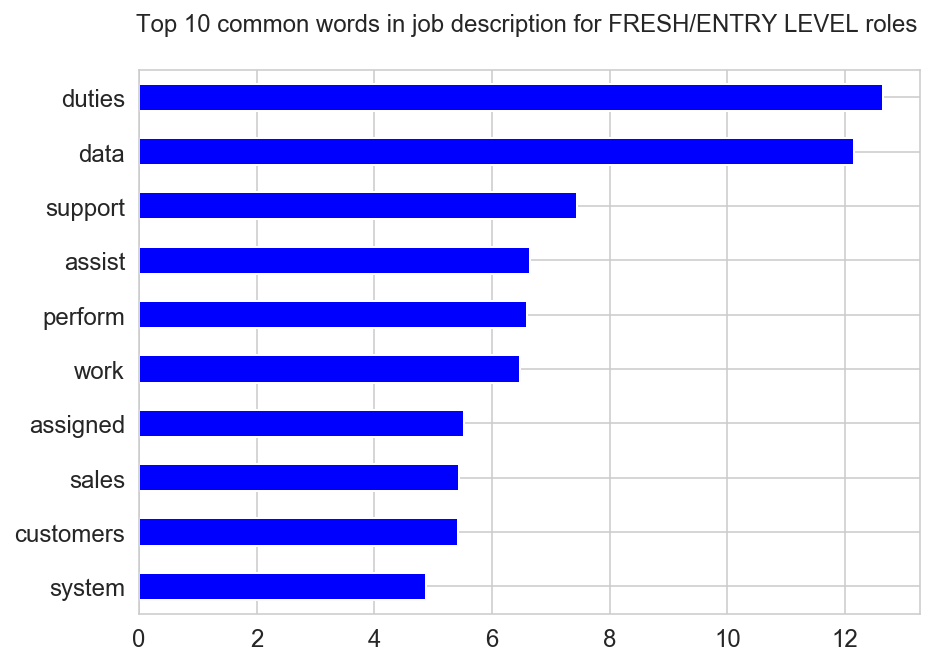

In [174]:
# common words for each seniority level

seniority = ['senior management', 'middle management', 'manager', 'professional',
             'senior executive', 'executive', 'junior executive', 'non-executive',
             'fresh/entry level']

for i, v in enumerate(seniority):
    word_counts[df['seniority']==v].sum(axis=0).sort_values(
    ascending = False).head(10).sort_values().plot(
    kind='barh',colormap='winter', figsize=(7,5))
    plt.title('Top 10 common words in job description for '+v.upper() +' roles \n',
              size=12)
    plt.yticks(size=12)
    plt.xticks(size=12)
    plt.show()

In [175]:
# define senior positions as 'senior management', 'middle management', 'manager'
# define junior positions as 'professional', 'senior executive', 'executive', 
# 'junior executive', 'non-executive', 'fresh/entry level'

In [176]:
df['is_senior'] = df['seniority'].map(
    lambda x: 1 if x in ['senior management', 'middle management', 'manager'] else 0)

In [177]:
y7 = df['is_senior']

In [178]:
y7.value_counts()

0    1291
1     345
Name: is_senior, dtype: int64

In [179]:
# baseline is junior roles
len(y7[y7==0])/len(y7)

0.789119804400978

In [180]:
word_counts[y7==1].sum(axis=0).sort_values(ascending = False).head(10).index

Index(['business', 'data', 'management', 'team', 'sales', 'project', 'product',
       'marketing', 'work', 'manager'],
      dtype='object')

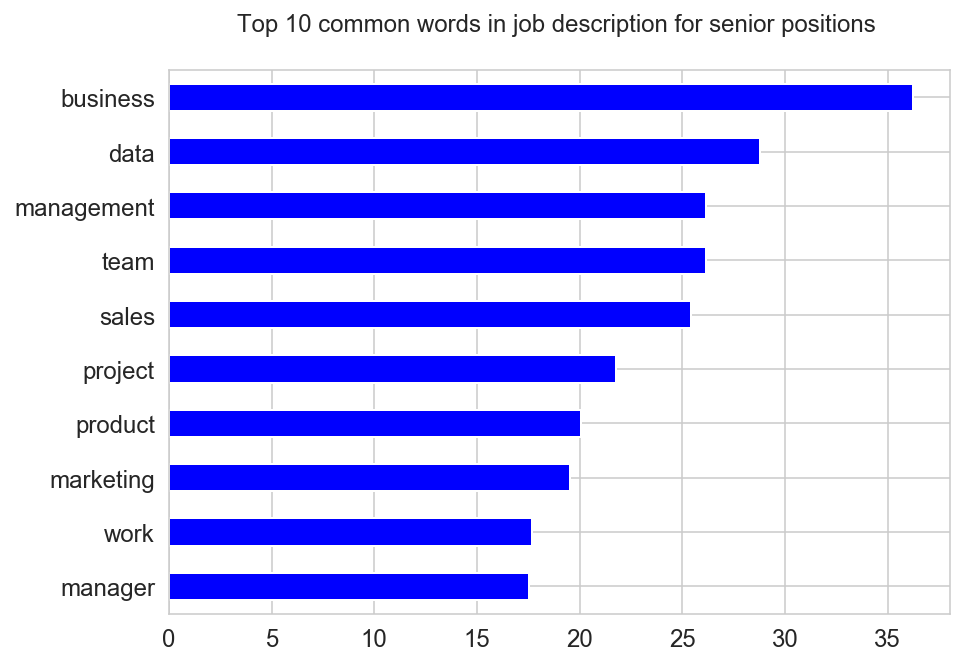

In [181]:
# top 10 common words for senior positions
word_counts[y7==1].sum(axis=0).sort_values(
ascending = False).head(10).sort_values().plot(
kind='barh',colormap='winter', figsize=(7,5))
plt.title('Top 10 common words in job description for senior positions \n', size=12)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

### Modelling on job description column for seniority

In [182]:
# model 1: multinomial Naive Bayes classifier on job_description column
clf = MultinomialNB().fit(X6, y7)
scores = cross_val_score(clf, X6, y7, cv=5)
print(scores)
print(np.mean(scores))

[0.80792683 0.79204893 0.81039755 0.79816514 0.80122324]
0.8019523383307228


In [183]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X6, y7, random_state=0, test_size=0.2, stratify = y7)

In [184]:
# check columns are the same
X_train6.shape, X_test6.shape

((1308, 200), (328, 200))

In [185]:
clf3 = MultinomialNB().fit(X_train6, y_train6)
clf3_pred = clf3.predict(X_test6)
clf3_pred_pp = clf3.predict_proba(X_test6)

In [186]:
clf3.score(X_test6, y_test6)

0.8048780487804879

In [187]:
fpr_clf3, tpr_clf3, _ = roc_curve(y_test6, clf3_pred_pp[:,1])
roc_auc_clf3 = auc(fpr_clf3, tpr_clf3)
roc_auc_clf3

0.7773767556376252

In [188]:
print(classification_report(y_test6, clf3_pred))
print('baseline accuracy:', len(y7[y7==0])/len(y7))
print('mean accuracy:', clf3.score(X_test6, y_test6))
print('roc_auc:',roc_auc_clf3)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       259
           1       0.67      0.14      0.24        69

   micro avg       0.80      0.80      0.80       328
   macro avg       0.74      0.56      0.56       328
weighted avg       0.78      0.80      0.75       328

baseline accuracy: 0.789119804400978
mean accuracy: 0.8048780487804879
roc_auc: 0.7773767556376252


In [189]:
# accuracy score (0.80) is better than baseline (0.79)

In [190]:
clf3_conmat = pd.DataFrame(confusion_matrix(y_test6, clf3_pred),
                                        index = ['not_senior', 'senior'],
                        columns=['predicted_not_senior','predicted_senior'])
clf3_conmat

,predicted_not_senior,predicted_senior
not_senior,254,5
senior,59,10


In [191]:
# model 2: logistic regression gridsearch on job_description column
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train6, y_train6)
lr.score(X_test6, y_test6)

0.8140243902439024

In [192]:
# use GridSearch to find best parameters
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gs3 = GridSearchCV(lr, gs_params, cv=5, verbose=1)

In [193]:
lr_gs3.fit(X_train6, y_train6)
print('best_score:', lr_gs3.best_score_, '\n')
print('best parameters:', lr_gs3.best_params_, '\n')
print('best_lr:', lr_gs3.best_estimator_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best_score: 0.8172782874617737 

best parameters: {'C': 0.7054802310718645, 'penalty': 'l2', 'solver': 'liblinear'} 

best_lr: LogisticRegression(C=0.7054802310718645, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


In [194]:
lr_gs3_pred = lr_gs3.best_estimator_.predict(X_test6)
lr_gs3_pred_pp1 = lr_gs3.best_estimator_.predict_proba(X_test6)

In [195]:
fpr_lr_gs3, tpr_lr_gs3, _ = roc_curve(y_test6, lr_gs3_pred_pp1[:,1])
roc_auc_lr_gs3 = auc(fpr_lr_gs3, tpr_lr_gs3)
roc_auc_lr_gs3

0.7870572435789827

In [196]:
print(classification_report(y_test6, lr_gs3_pred))
print('baseline accuracy:', len(y7[y7==0])/len(y7))
print('mean accuracy:', lr_gs3.best_estimator_.score(X_test6, y_test6))
print('roc_auc:',roc_auc_lr_gs3)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       259
           1       0.68      0.25      0.36        69

   micro avg       0.82      0.82      0.82       328
   macro avg       0.75      0.61      0.63       328
weighted avg       0.80      0.82      0.78       328

baseline accuracy: 0.789119804400978
mean accuracy: 0.8170731707317073
roc_auc: 0.7870572435789827


In [197]:
lr_gs3_conmat = pd.DataFrame(confusion_matrix(y_test6, lr_gs3_pred),
                                       index = ['not_senior', 'senior'],
                        columns=['predicted_not_senior','predicted_senior'])
lr_gs3_conmat

,predicted_not_senior,predicted_senior
not_senior,251,8
senior,52,17


In [198]:
# roc_auc for logistic regression is slightly better than MultinomialNB.
# Prediction and recall for logistic regression model is also better and it can predict
# more senior positions correctly.

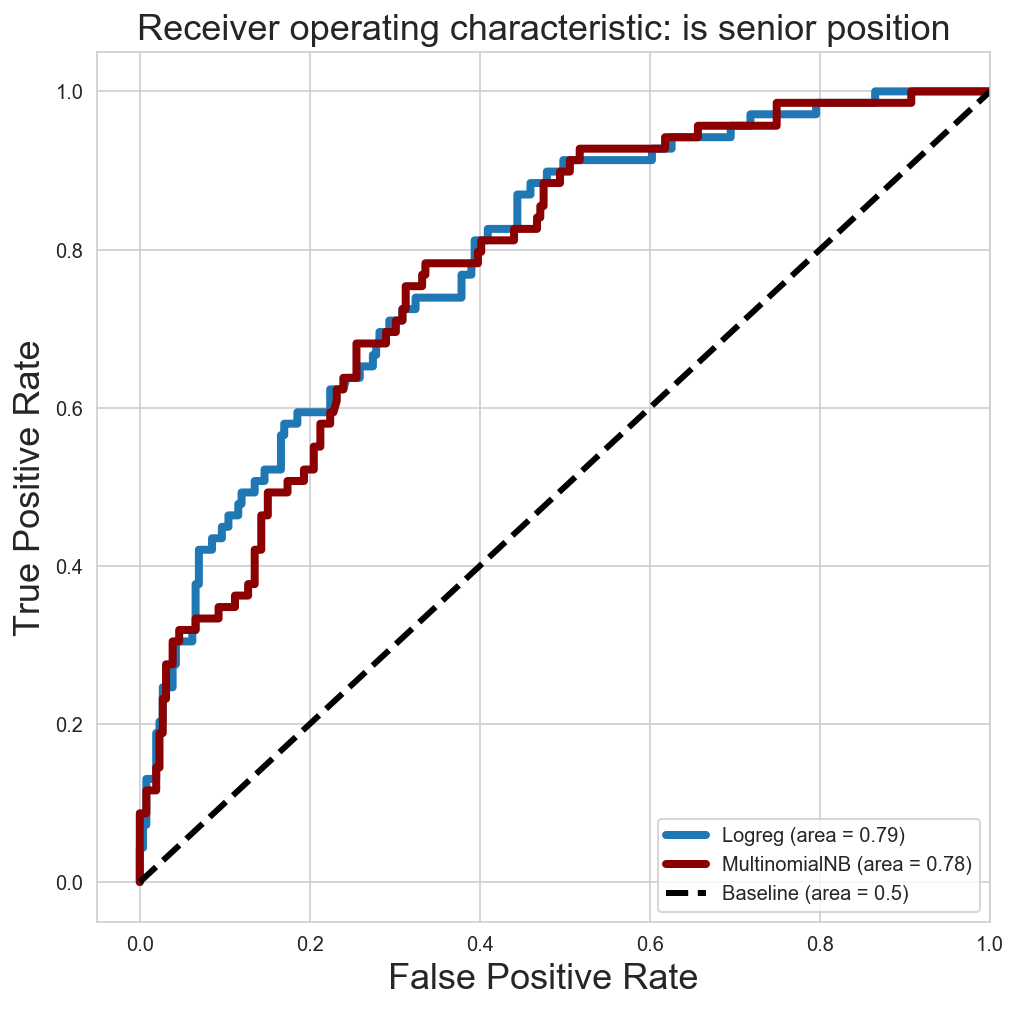

In [199]:
plt.figure(figsize=[8,8])
# roc_auc_lr_gs3 = auc(fpr_lr_gs3, tpr_lr_gs3)
plt.plot(fpr_lr_gs3, tpr_lr_gs3, label='Logreg (area = %0.2f)' % roc_auc_lr_gs3, 
         linewidth=4)
# roc_auc_clf3 = auc(fpr_clf3, tpr_clf3)
plt.plot(fpr_clf3, tpr_clf3, label='MultinomialNB (area = %0.2f)' % roc_auc_clf3, 
         linewidth=4, color='darkred')
plt.plot([0, 1], [0, 1], 'k--', linewidth=3, label='Baseline (area = 0.5)')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is senior position', fontsize=18)
plt.legend(loc="lower right")
plt.show()


### Brief Writeup

Before cleaning the dataset, average monthly salaries were; <br>
Minimum: \\$10, maximum: \\$180,000, Mean: \\$6,526

It seems like there was a typo error as some positions don't warrant such high pay. I removed 1 zero from the salary of these jobs: 
- SR Site Start-up & Regulatory Specialist at INC RESEARCH CRO SINGAPORE PTE. LTD.
- Accountant at SMITECH ENGINEERING PTE LTD
- Laboratory Officer at RAFFLES INSTITUTION 
- Elementary School Counselor at SINGAPORE AMERICAN SCHOOL LIMITED
- Staff SW Engineer at VISA WORLDWIDE PTE. LIMITED

Also removed Chief Operationg Officer at ULTRA CLEAN ASIA PACIFIC PTE. LTD. as the monthly salary of \\$60,000 is an observed outlier. 

As the distribution of average monthly salaries is skewed right, due to outliers, I have decided to take the median average monthly salary (\\$6,000) as the threshold to split between high or low salaries.

Above \\$6,000 is defined as high and not more than \\$6,000 is defined as low salaries.

From the job postings, 45% of jobs have high salaries and 55% have low salaries.

There are 9 levels detailed on the website. It is observed that the higher the seniority level, the higher is the salary.

>The top 10 common words in job title that offers high salaries:<br>
'manager', 'senior', 'engineer', 'data', 'consultant', 'business', 'analyst', 'software', 'developer', 'scientist'.

From my models, job title is better in predicting if a job posting will have higher salary than seniority as it has a higher mean accuracy and roc_auc score.

>The words 'years experience' and 'communication skills' in the requirement have the greatest significance for above average median salary. 

From the dataset, only 3.3% of job postings are data scientist roles. 

>The top 10 common words in the job description for data science roles are:<br>
'data', 'learning', 'analytics', 'solutions', 'business', 'work', 'research', 'team', 'develop', 'analysis'.

From my 3 models, BernoulliNB model is the best as it is the only model that can predict the data scientist roles.

I define senior and junior positions as;
Senior positions: 'senior management', 'middle management', 'manager'

Junior positions: 'professional',  'senior executive', 'executive', 'junior executive', 'non-executive', 'fresh/entry level'

>The top 10 common words in the job description for senior positions are:<br>
'business', 'data', 'management', 'team', 'sales', 'project', 'product', 'marketing', 'work', 'manager'. 

From my 2 models, Logistic Regression model is slightly better in predicting senior positions.


In [200]:
# to try and model using requirement column in the future to check the key words
# that are important for distinguishing junior vs. senior positions


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.